导入库与函数

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import function as fc
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


字段信息
| 数据字段名称      | 字段定义         | 字段数据值           |
|-----------------|----------------|--------------------|
| vid             | 车辆ID          | XX_xxx             |
| yr_modahrmn     | 数据采集时间      | yymmdd-hhmmss      |
| vehicle_state   | 车辆状态         | 0x01：车辆启动状态；0x02：熄火；0x03：其他状态；“0xFE”表示异常；“0xFF”表示无效 |
| charging_status | 充电状态         | 0x01：停车充电；0x02：行驶充电；0x03：未充电状态；0x04：充电完成；“0xFE”表示异常；“0xFF”表示无效 |
| mode            | 运行模式         | 0x01: 纯电； 0x02：混动； 0x03：燃油； 0xFE 表示异常； 0xFF 表示无效 |
| speed           | 车速            | 有效值范围：0～2200（表示 0 km/h～220 km/h），最小计量单元：0.1km/h，“0xFF,0xFE”表示异常，“0xFF,0xFF”表示无效 |
| gear            | 挡位            | 挡位定义见表 A.1    |
| total_volt      | 总电压           | 有效值范围：0～10000（表示 0V～1000V），最小计量单元：0.1V，“0xFF,0xFE”表示异常，“0xFF,0xFF”表示无效 |
| total_current   | 总电流           | 有效值范围：0～20000（偏移量 1000A，表示-1000A～+1000A），最小计量单元：0.1A，“0xFF,0xFE”表示异常，“0xFF,0xFF”表示无效 |
| mileage         | 累计里程          | 有效值范围：0～9999999（表示 0km～999999.9km），最小计量单元：0.1km。“0xFF, 0xFF, 0xFF,0xFE”表示异常，“0xFF,0xFF,0xFF,0xFF”表示无效 |
|    | SOC-国标         | 有效值范围：0～100（表示 0%～100%），最小计量单元：1%，“0xFE”表示异常，“0xFF”表示无效 |
| cell_volt_list  | 单体电池电压值列表  | 有效值：0~15000，单位0.001V |
| max_volt_num    | 最高电压电池子系统号 | 有效值范围：1～250，“0xFE”表示异常，“0xFF”表示无效 |
| max_cell_volt   | 电池单体电压最高值  | 有效值范围：0～15 000（表示 0V～15V），最小计量单元：0.001V，“0xFE，0xFE”表示异常，“0xFF ，0xFF”表示无效 |
| max_volt_cell_id | 最高电压电池       | 有效值范围： 1～250，“0xFE”表示异常，“0xFF”表示无效。 |
| min_volt_num    | 最低电压电池子系统号 | 有效值范围：1～250，“0xFE”表示异常，“0xFF”表示无效 |
| min_cell_volt   | 电池单体电压最低值  | 有效值范围：0～15 000（表示 0V～15V），最小计量单元：0.001V，“0xFF，0xFE”表示异常，“0xFF ，0xFF”表示无效 |
| min_cell_volt_id | 最低电压电池       | 有效值范围： 1～250，“0xFE”表示异常，“0xFF”表示无效。 |
| max_temp_num    | 最高温度子系统号    | 有效值范围：1～250，“0xFE”表示异常，“0xFF”表示无效 |
| max_temp        | 最高温度值         | 有效值范围：0～250（数值偏移量40℃，表示-40℃～210℃），最小计量单元：1℃，“0xFE”表示异常，“0xFF”表示无效 |
| max_temp_probe_id | 最高温度探针      | 有效值范围： 1～250，“0xFE”表示异常，“0xFF”表示无效。 |
| min_temp_num    | 最低温度子系统号    | 有效值范围：1～250，“0xFE”表示异常，“0xFF”表示无效 |
| min_temp        | 最低温度值         | 有效值范围：0～250（数值偏移量40℃，表示-40℃～210℃），最小计量单元：1℃，“0xFE”表示异常，“0xFF”表示无效 |
| min_temp_probe_id | 最低温度探针      | 有效值范围： 1～250，“0xFE”表示异常，“0xFF”表示无效。 |
| sing_temp_num   | 单体电池温度探针总数 | N个温度探针，有效值范围：1～65531，“0xFF,0xFE”表示异常，“0xFF,0xFF”表示无效 |
| cell_temp_list  | 单体电池温度值列表  | 有效值范围：0～250 （数值偏移量 40℃，表示-40℃～+210℃），最小计量单元：1℃，“0xFE”表示异常，“0xFF”表示无效 |
| max_alarm_lvl   | 最高报警等级      | 为当前发生的故障中的最高等级值，有限制范围0~3，“0”表示无故障；“1”表示1级故障，指不影响车辆正常行驶的故障；“2”表示2级故障，指影响车辆性能，需要驾驶员限制行驶的故障；“3”表示3级故障，为最高级别故障，指驾驶员应立即停车处理或请求救援的故障。具体等级对应的故障内容由厂商自行定义。“0xFE”表示异常，“0xFF”表示无效 |
| bat_fault_list  | 充电储能装置故障代码列表 | 扩展性数据，由厂商自行定义，可充电储能装置故障个数等于可充电储能装置故障总数N1。 |
| isulate_r       | 绝缘阻值         | 有效范围 0～60000（表示 0KΩ ～60000KΩ），最小计量单元：1KΩ |
| dcdc_stat       | DC-DC状态       | 0x01： 工作； 0x02： 断开，“0xFE”表示异常，“0xFF”表示无效。 |
| sing_volt_num   | 单体电池总数      | N个电池单体，有效值范围：1～65531，“0xFF,0xFE”表示异常，“0xFF,0xFF”表示无效 |
| alarm_info      | 通用报警标志      | 通用报警标志位定义见表2 |


In [2]:
#参数
#数据字段数
num_fields = 32 
#数据路径
path = '/Users/wanghao/jupyter/data/2022_ncbdc/LB_04/part-00000-d927b640-ae1a-4cad-a86b-77d14c14c00c-c000.csv'
# 车辆属性值
attributes = ['vid', 'mode', 'sing_temp_num', 'sing_volt_num']

In [3]:
#导入数据
data = fc.import_and_check_data(path, num_fields)

Data Shape: (687634, 32)
Data Columns: Index(['vid', 'yr_modahrmn', 'speed', 'vehicle_state', 'charging_status',
       'mode', 'total_volt', 'total_current', 'mileage', 'standard_soc',
       'cell_volt_list', 'max_cell_volt', 'max_volt_cell_id', 'min_cell_volt',
       'min_cell_volt_id', 'max_temp', 'max_temp_probe_id', 'min_temp',
       'min_temp_probe_id', 'max_alarm_lvl', 'bat_fault_list', 'isulate_r',
       'dcdc_stat', 'sing_temp_num', 'sing_volt_num', 'cell_temp_list', 'gear',
       'max_volt_num', 'min_volt_num', 'max_temp_num', 'min_temp_num',
       'alarm_info'],
      dtype='object')
数据字段齐全


In [4]:
#查看字段种类
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687634 entries, 0 to 687633
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   vid                687634 non-null  object 
 1   yr_modahrmn        687634 non-null  object 
 2   speed              687634 non-null  int64  
 3   vehicle_state      687632 non-null  float64
 4   charging_status    687634 non-null  int64  
 5   mode               687634 non-null  int64  
 6   total_volt         687634 non-null  int64  
 7   total_current      687634 non-null  int64  
 8   mileage            687634 non-null  int64  
 9   standard_soc       687634 non-null  int64  
 10  cell_volt_list     687634 non-null  object 
 11  max_cell_volt      687634 non-null  int64  
 12  max_volt_cell_id   687634 non-null  int64  
 13  min_cell_volt      687634 non-null  int64  
 14  min_cell_volt_id   687634 non-null  int64  
 15  max_temp           687632 non-null  float64
 16  ma

In [5]:
attributes_results = fc.extract_vehicle_attributes(data, attributes)
print(attributes_results)

#删除车辆属性值
data = fc.drop_columns(data, attributes)

{'vid': '262f592320fa4dbcb9beb2853208900b', 'mode': 1, 'sing_temp_num': 34, 'sing_volt_num': 95}
已删除列名为 ['vid', 'mode', 'sing_temp_num', 'sing_volt_num'] 的列


这是一台纯电动汽车，电池由95个单体电池组成，34个温度探针

In [6]:
data = fc.drop_duplicated(data)

删除重复数据前： (687634, 28)
删除重复的行数为： 15990
删除重复数据后： (671644, 28)


数据中的重复行有15990行

## 时间处理

In [7]:
data = fc.time_preprocessing(data,time_col='yr_modahrmn',format='%Y-%m-%d %H:%M:%S')

数据的总时间跨度为： 182 days 18:38:39
最小采样间隔为： 0 days 00:00:09
平均采样间隔为： 0 days 00:00:23.512370411
最大采样间隔为： 1 days 17:39:44


## 行驶字段分析
包括 车速 档位 里程 车辆状态（衍生特征）

### speed
车速：有效值范围：0～2200（表示 0 km/h～220 km/h），最小计量单元：0.1km/h，“0xFF,0xFE”表示异常，“0xFF,0xFF”表示无效

数据类型为 int64
--------------------------------------------------
count    671644.000000
mean        151.068066
std         202.147146
min           0.000000
25%           0.000000
50%          26.000000
75%         272.000000
max        1130.000000
Name: speed, dtype: float64
--------------------------------------------------


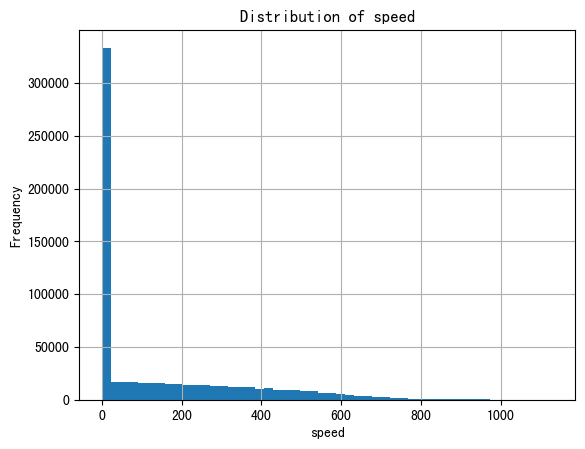

--------------------------------------------------


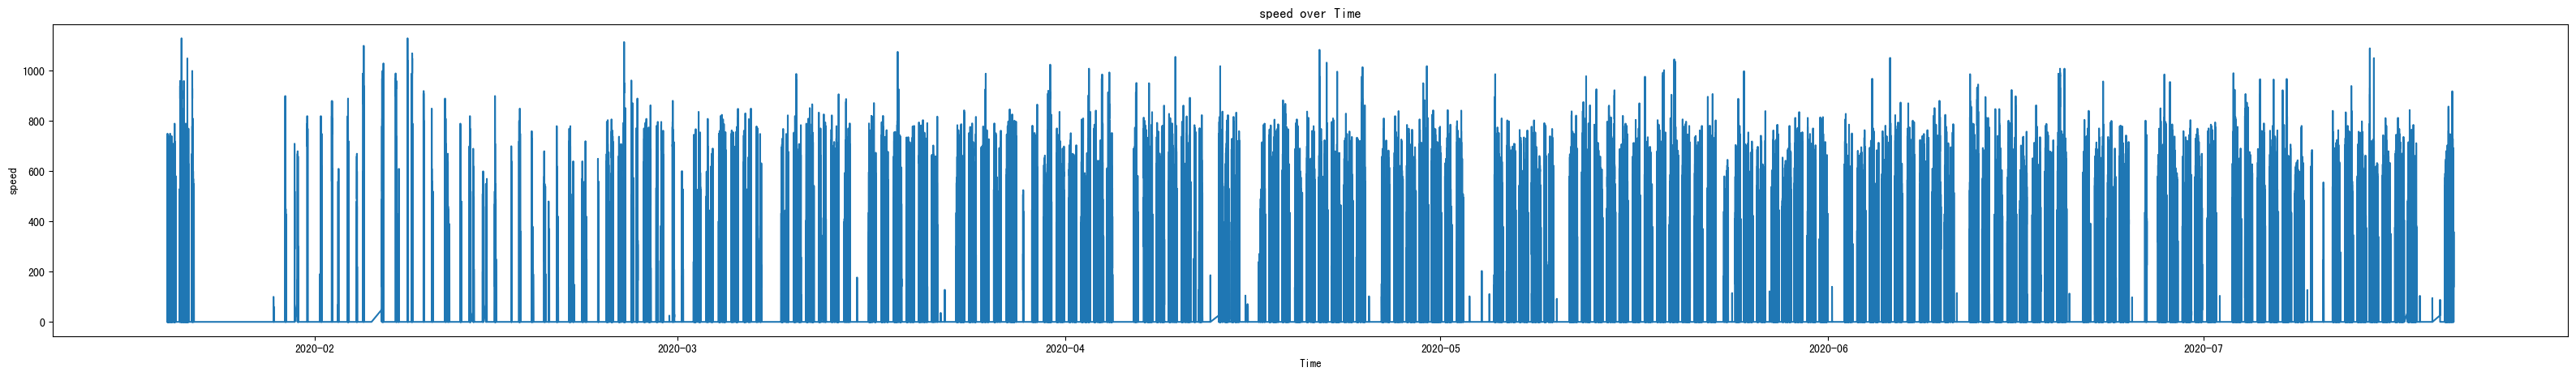

--------------------------------------------------
'speed' 有 0 个缺失值
'speed' 的缺失值占比为 0.00%
--------------------------------------------------
有效值范围为 [0, 2200]
'speed' 共有 0 个范围外值


In [10]:
fc.analyze_column(data, 'speed',0, 2200 )

### gear
挡位 

数据类型为 int64
--------------------------------------------------
count    671644.000000
mean         13.011779
std           4.131094
min           0.000000
25%          14.000000
50%          14.000000
75%          15.000000
max          15.000000
Name: gear, dtype: float64
--------------------------------------------------


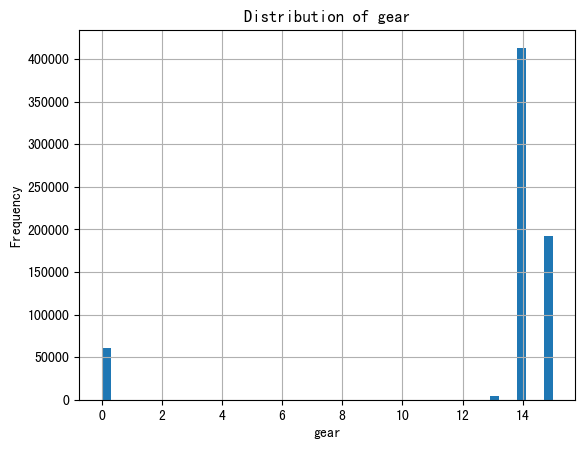

--------------------------------------------------


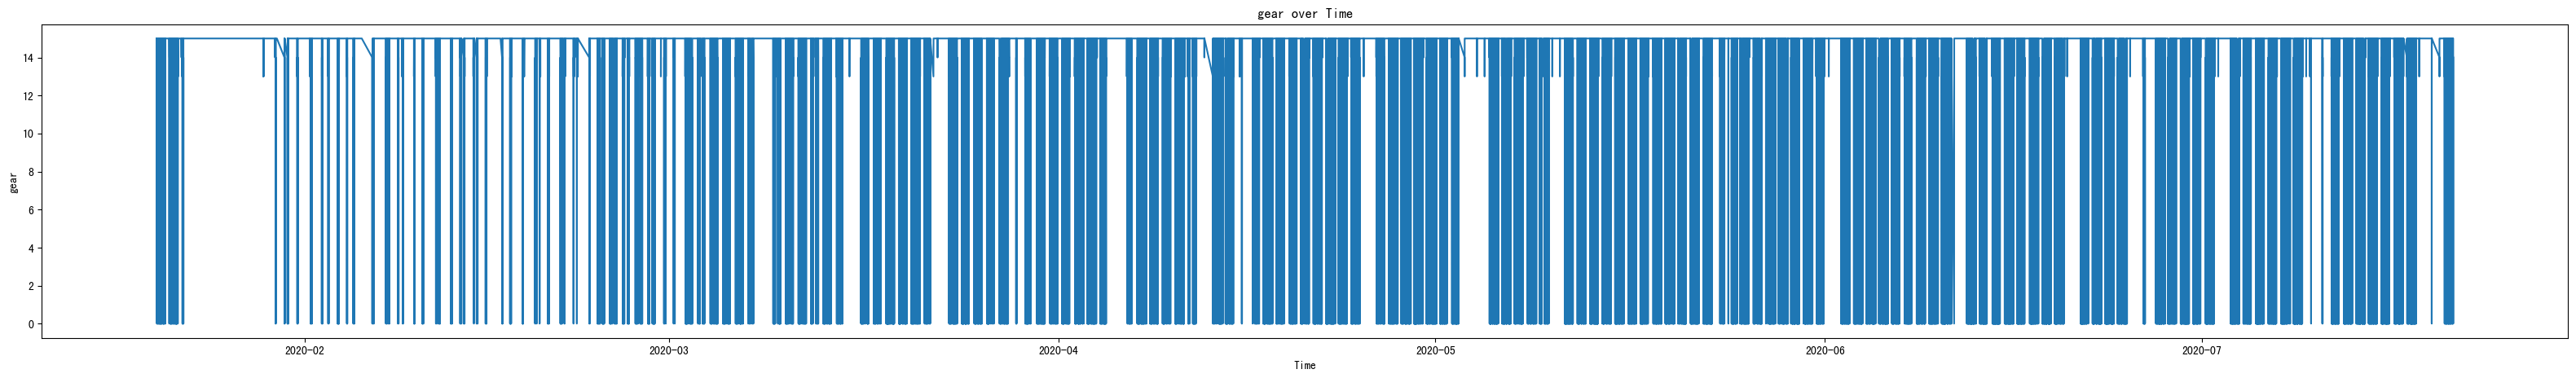

--------------------------------------------------
'gear' 有 0 个缺失值
'gear' 的缺失值占比为 0.00%
--------------------------------------------------
有效值范围为 [0, 16]
'gear' 共有 0 个范围外值


In [11]:
fc.analyze_column(data, 'gear',0,16)

In [12]:
#档位处理成3列，空档是0，1～6档是1～6，倒档是7，自动D档是8，停车P档是9，未知档位输出null
data['驱动力'], data['制动力'], data['挡位'] = zip(*data['gear'].apply(fc.parse_gear))

数据类型为 int64
--------------------------------------------------
count    671644.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: 驱动力, dtype: float64
--------------------------------------------------


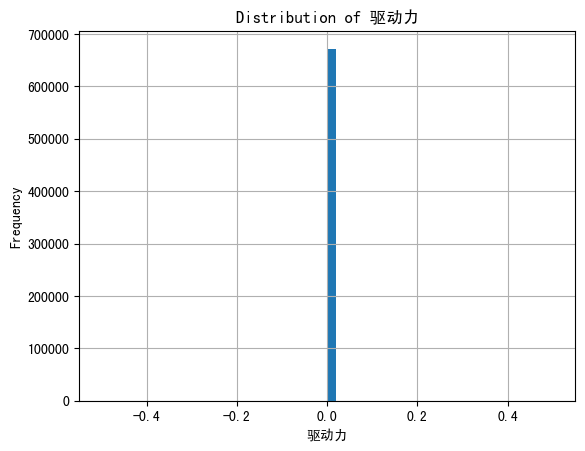

--------------------------------------------------


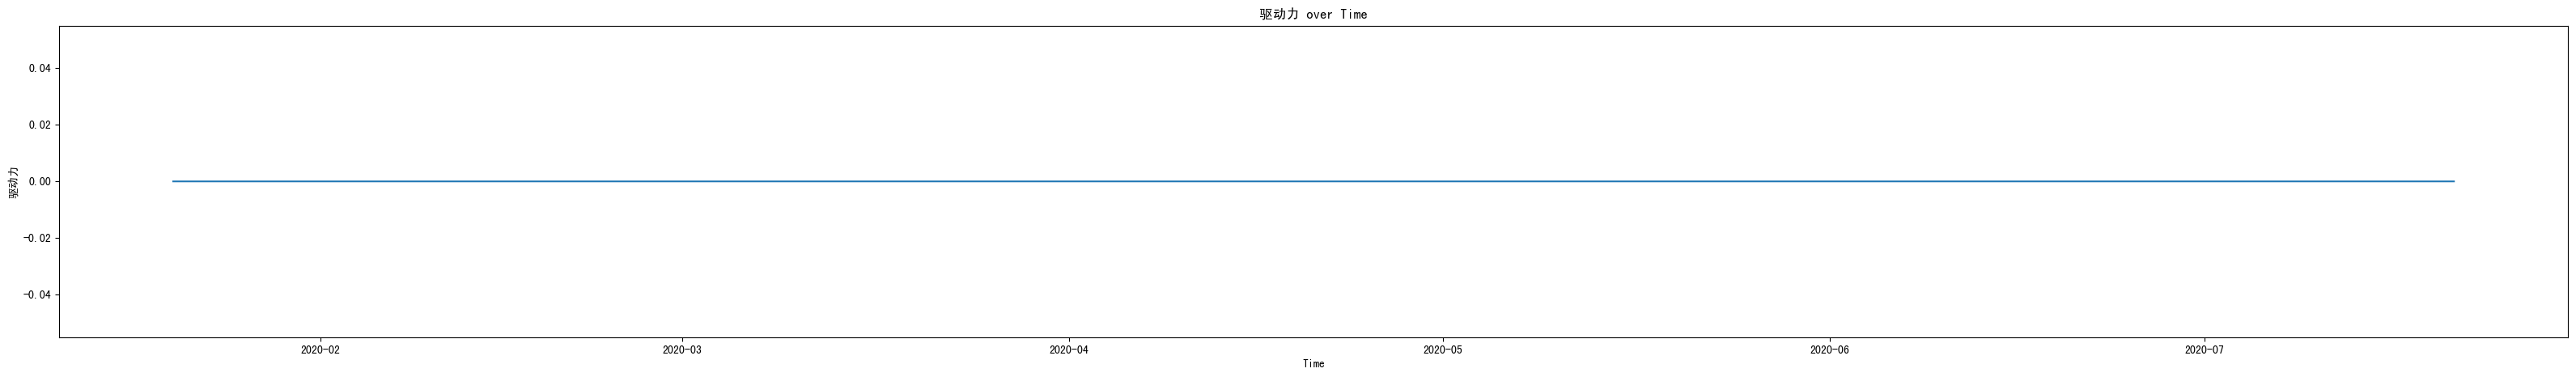

--------------------------------------------------
'驱动力' 有 0 个缺失值
'驱动力' 的缺失值占比为 0.00%
--------------------------------------------------
有效值范围为 [0, 1]
'驱动力' 共有 0 个范围外值


In [13]:
fc.analyze_column(data, '驱动力',0,1)

数据类型为 int64
--------------------------------------------------
count    671644.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: 制动力, dtype: float64
--------------------------------------------------


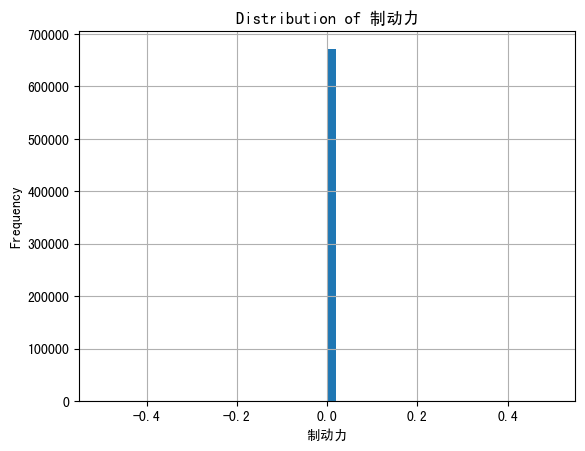

--------------------------------------------------


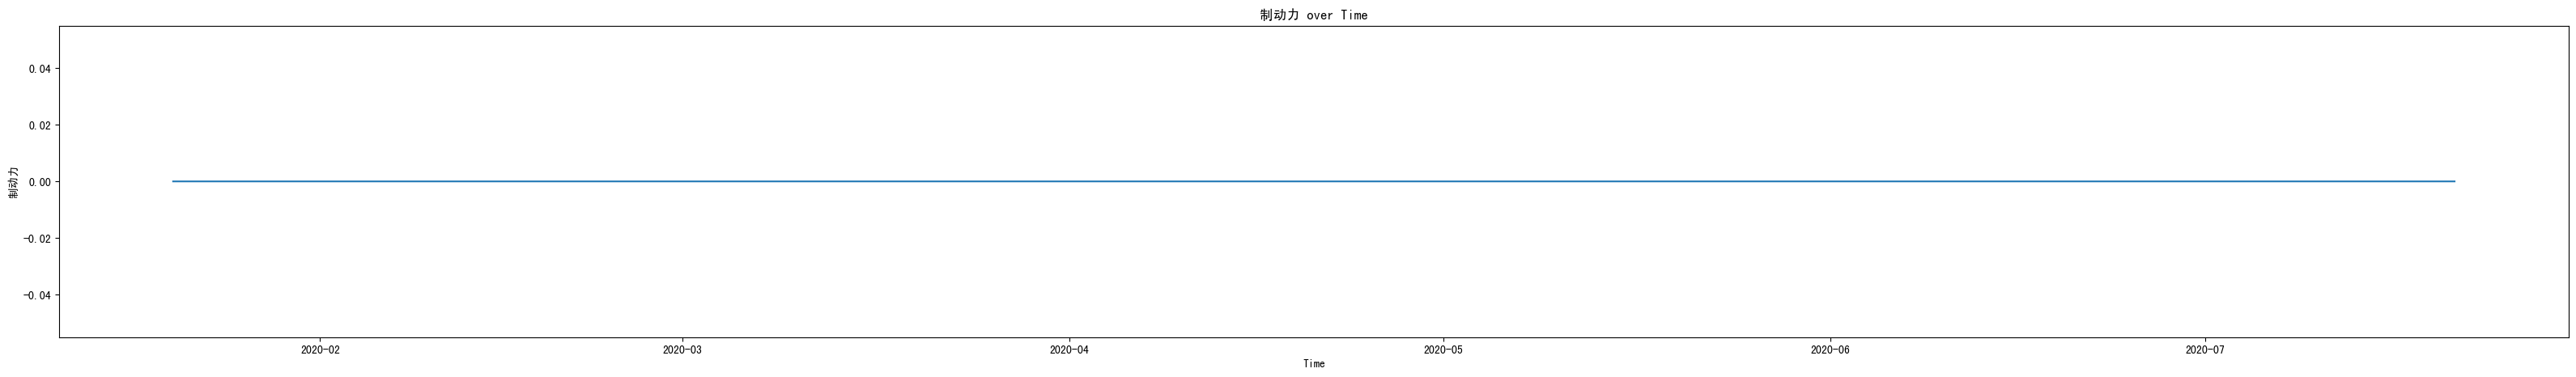

--------------------------------------------------
'制动力' 有 0 个缺失值
'制动力' 的缺失值占比为 0.00%
--------------------------------------------------
有效值范围为 [0, 1]
'制动力' 共有 0 个范围外值


In [14]:
fc.analyze_column(data, '制动力',0,1)

数据类型为 int64
--------------------------------------------------
count    671644.000000
mean          7.555102
std           2.427230
min           0.000000
25%           8.000000
50%           8.000000
75%           9.000000
max           9.000000
Name: 挡位, dtype: float64
--------------------------------------------------


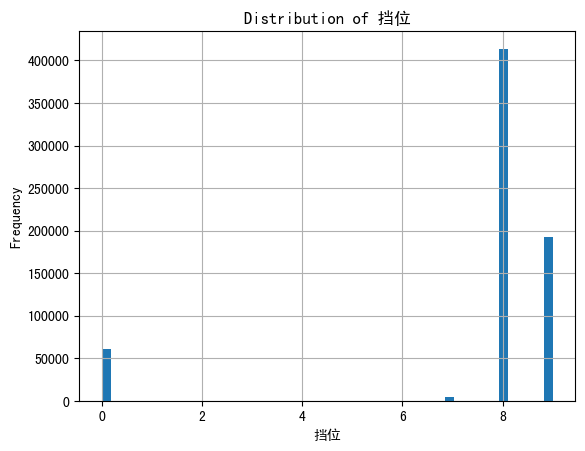

--------------------------------------------------


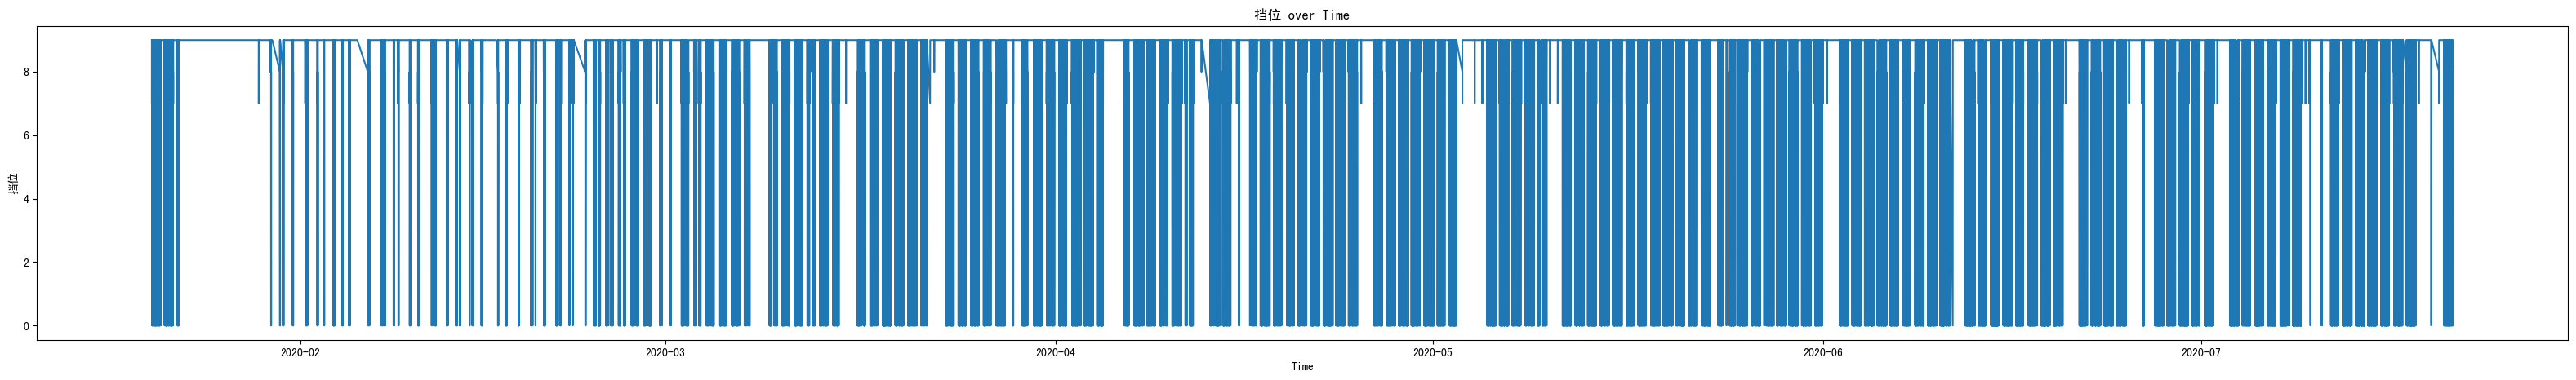

--------------------------------------------------
'挡位' 有 0 个缺失值
'挡位' 的缺失值占比为 0.00%


In [15]:
fc.analyze_column(data, '挡位')

分析：这是一台自动档的车，或许可以考虑档位与车速的关系？辅助后续筛查

### vehicle_state
车辆状态：0x01：车辆启动状态；0x02：熄火；0x03：其他状态；“0xFE”表示异常，“0xFF”表示无效

数据类型为 float64
--------------------------------------------------
count    671642.000000
mean          1.220187
std           0.416130
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           3.000000
Name: vehicle_state, dtype: float64
--------------------------------------------------


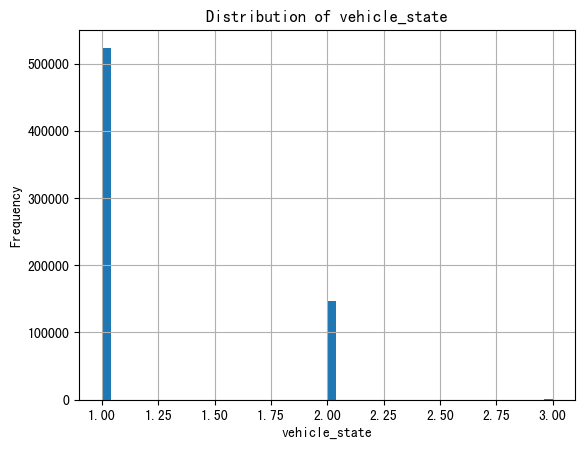

--------------------------------------------------


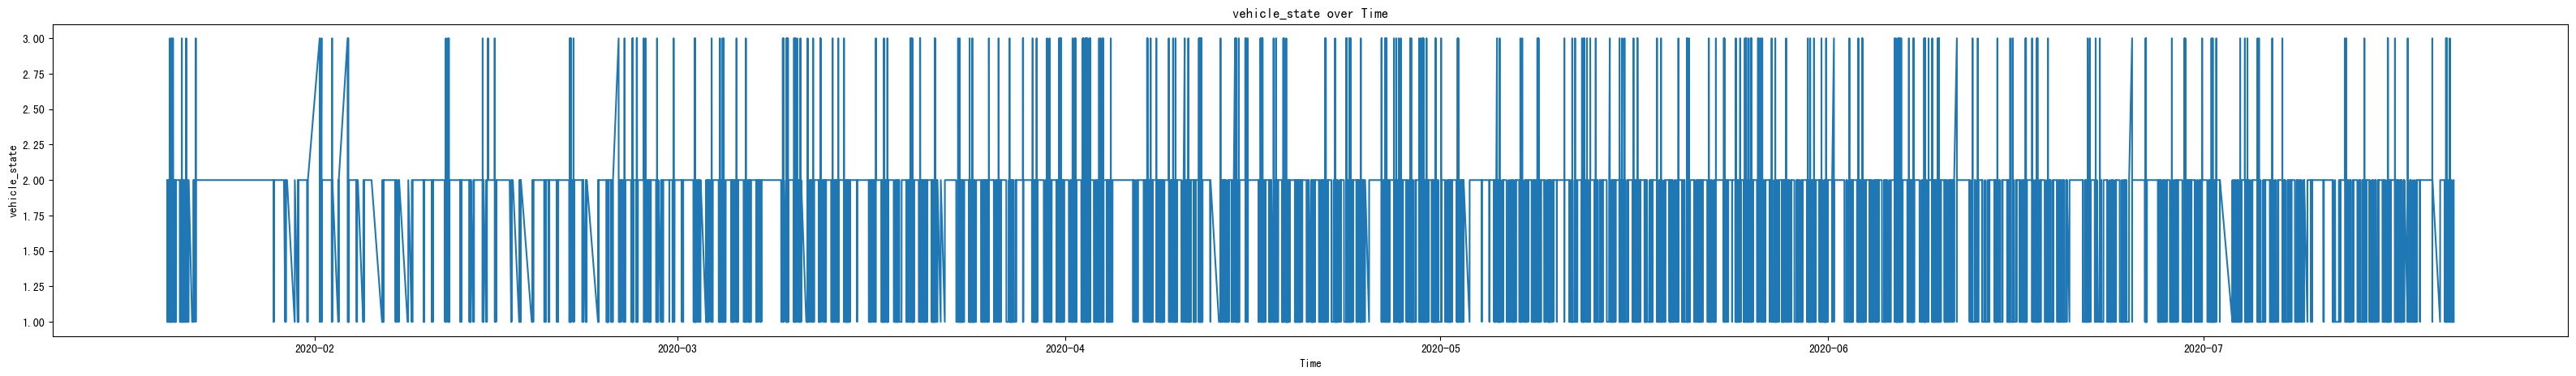

--------------------------------------------------
'vehicle_state' 有 2 个缺失值
'vehicle_state' 的缺失值占比为 0.00%
--------------------------------------------------
有效值范围为 [0, 3]
'vehicle_state' 共有 0 个范围外值


In [16]:
fc.analyze_column(data, 'vehicle_state',0,3)

In [17]:
#缺失值处理
#打印vehicle_state缺失值所在的行
data[data['vehicle_state'].isnull()]

,speed,vehicle_state,charging_status,total_volt,total_current,mileage,standard_soc,cell_volt_list,max_cell_volt,max_volt_cell_id,...,cell_temp_list,gear,max_volt_num,min_volt_num,max_temp_num,min_temp_num,alarm_info,驱动力,制动力,挡位
time,,,,,,,,,,,,,,,,,,,,,
2020-03-24 09:40:17,0,NaN,3,3451,4,643869,34,1:3631_3632_3632_3633_3632_3633_3634_3632_3632...,3635,19,...,64_64_64_64_64_64_64_64_64_64_64_65_65_65_65_6...,15,1,1,1,1,0,0,0,9
2020-05-24 16:37:14,0,NaN,3,3790,0,756077,80,1:3990_3989_3991_3991_3988_3991_3992_3989_3990...,3997,95,...,71_69_70_69_69_69_69_69_69_69_68_68_68_68_68_6...,15,1,1,1,1,0,0,0,9


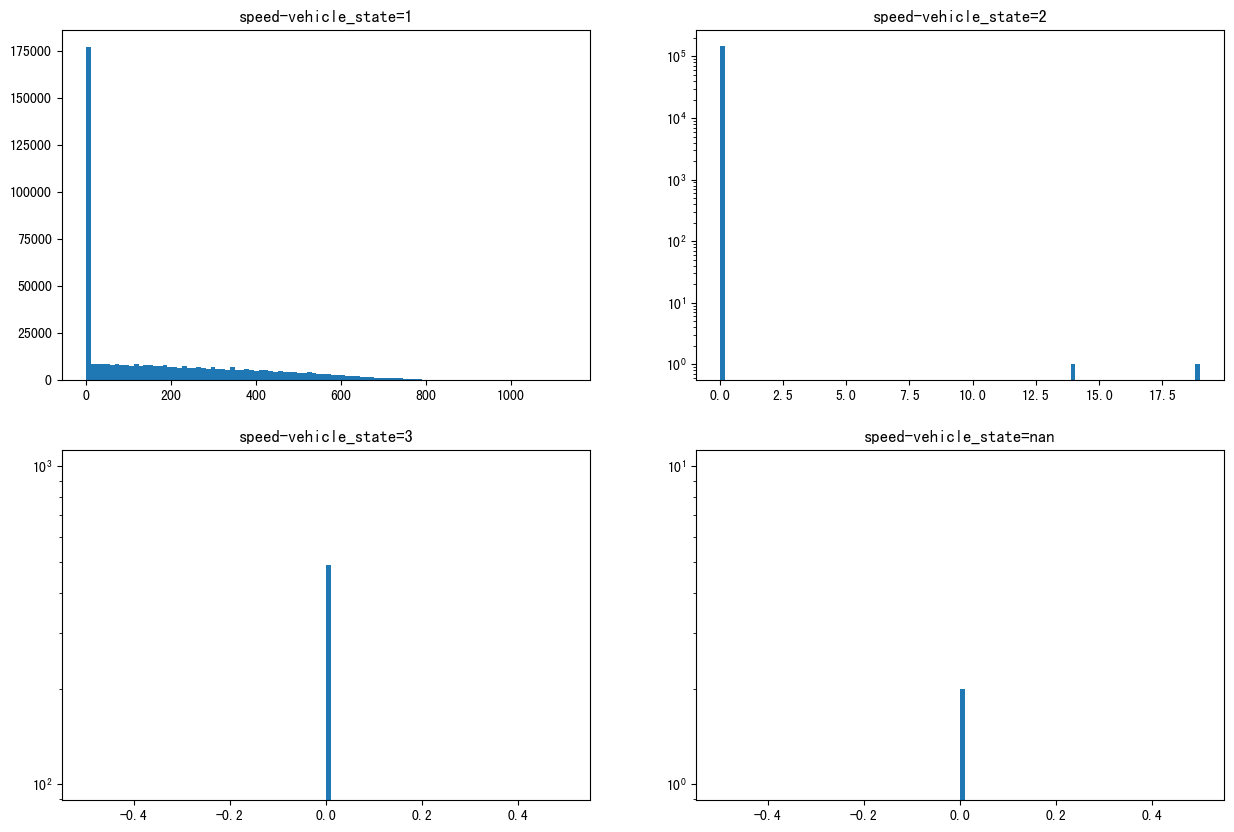

In [18]:
#绘制'vehicle_state'为1时，'speed'的分布情况图
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.title('speed-vehicle_state=1')
plt.hist(data[data['vehicle_state']==1]['speed'], bins=100)
plt.subplot(2, 2, 2)
plt.title('speed-vehicle_state=2')
plt.hist(data[data['vehicle_state']==2]['speed'], bins=100, log=True)
plt.subplot(2, 2, 3)
plt.title('speed-vehicle_state=3')
plt.hist(data[data['vehicle_state']==3]['speed'], bins=100, log=True)
plt.subplot(2, 2, 4)
plt.title('speed-vehicle_state=nan')
plt.hist(data[data['vehicle_state'].isnull()]['speed'], bins=100, log=True)
plt.show()

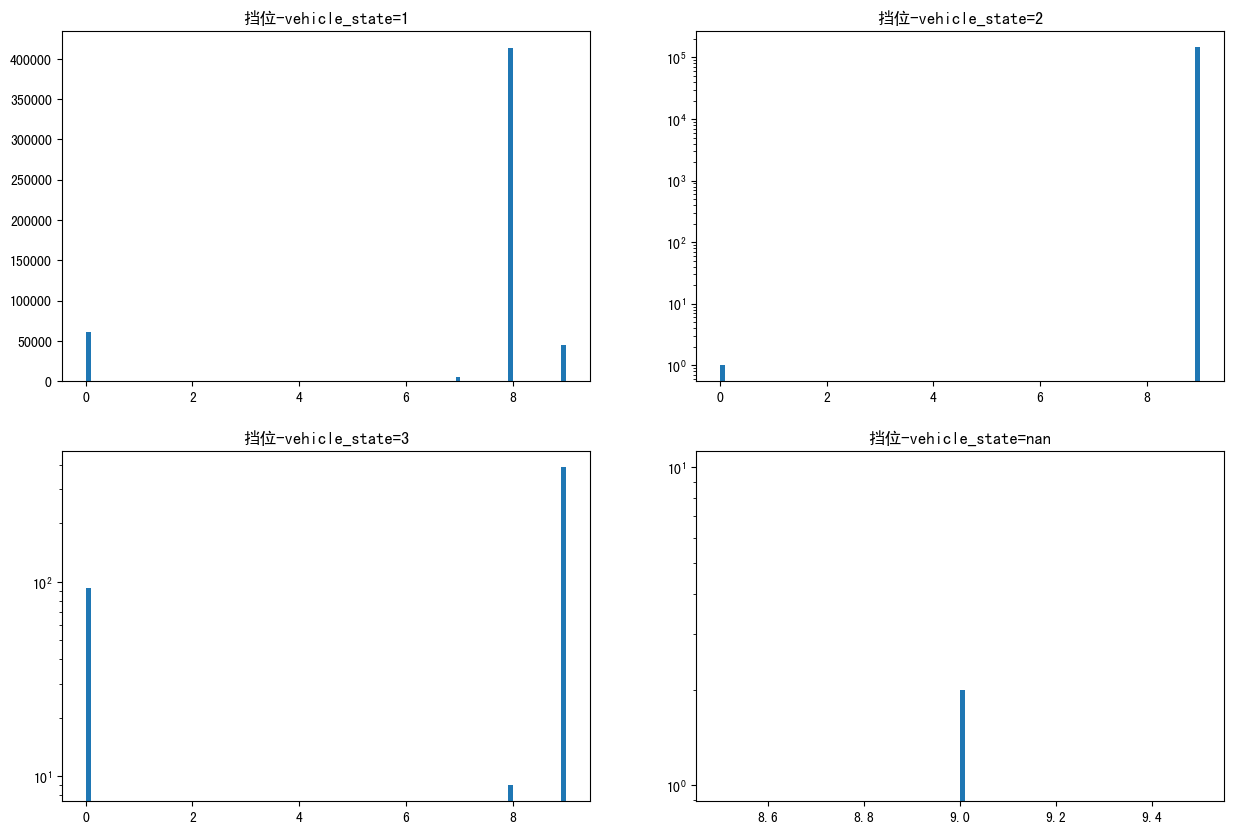

In [19]:
#绘制'vehicle_state'为1时，'档位'的分布情况图
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.title('挡位-vehicle_state=1')
plt.hist(data[data['vehicle_state']==1]['挡位'], bins=100)
plt.subplot(2, 2, 2)
plt.title('挡位-vehicle_state=2')
plt.hist(data[data['vehicle_state']==2]['挡位'], bins=100, log=True)
plt.subplot(2, 2, 3)
plt.title('挡位-vehicle_state=3')
plt.hist(data[data['vehicle_state']==3]['挡位'], bins=100, log=True)
plt.subplot(2, 2, 4)
plt.title('挡位-vehicle_state=nan')
plt.hist(data[data['vehicle_state'].isnull()]['挡位'], bins=100, log=True)
plt.show()

分析：缺失值待处理，并非整行缺失，可以填补，标签类数据，需要检查是否准确

### mileage
累计里程：有效值范围：0～9999999（表示 0km～999999.9km），最小计量单元：0.1km。“0xFF, 0xFF, 0xFF,0xFE”表示异常，“0xFF,0xFF,0xFF,0xFF”表示无效

数据类型为 int64
--------------------------------------------------
count    671644.000000
mean     728976.222898
std       80490.820109
min      587487.000000
25%      658336.000000
50%      728327.000000
75%      797540.000000
max      869642.000000
Name: mileage, dtype: float64
--------------------------------------------------


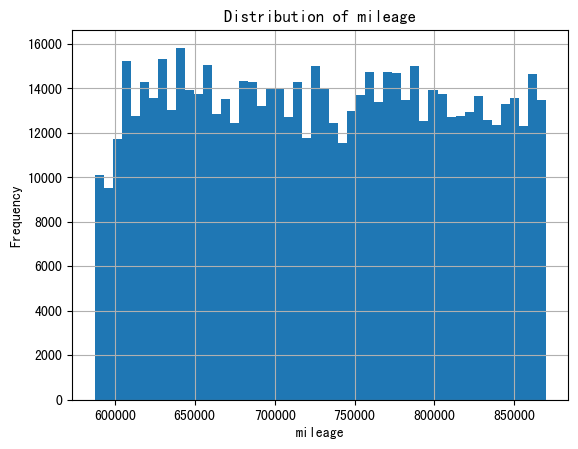

--------------------------------------------------


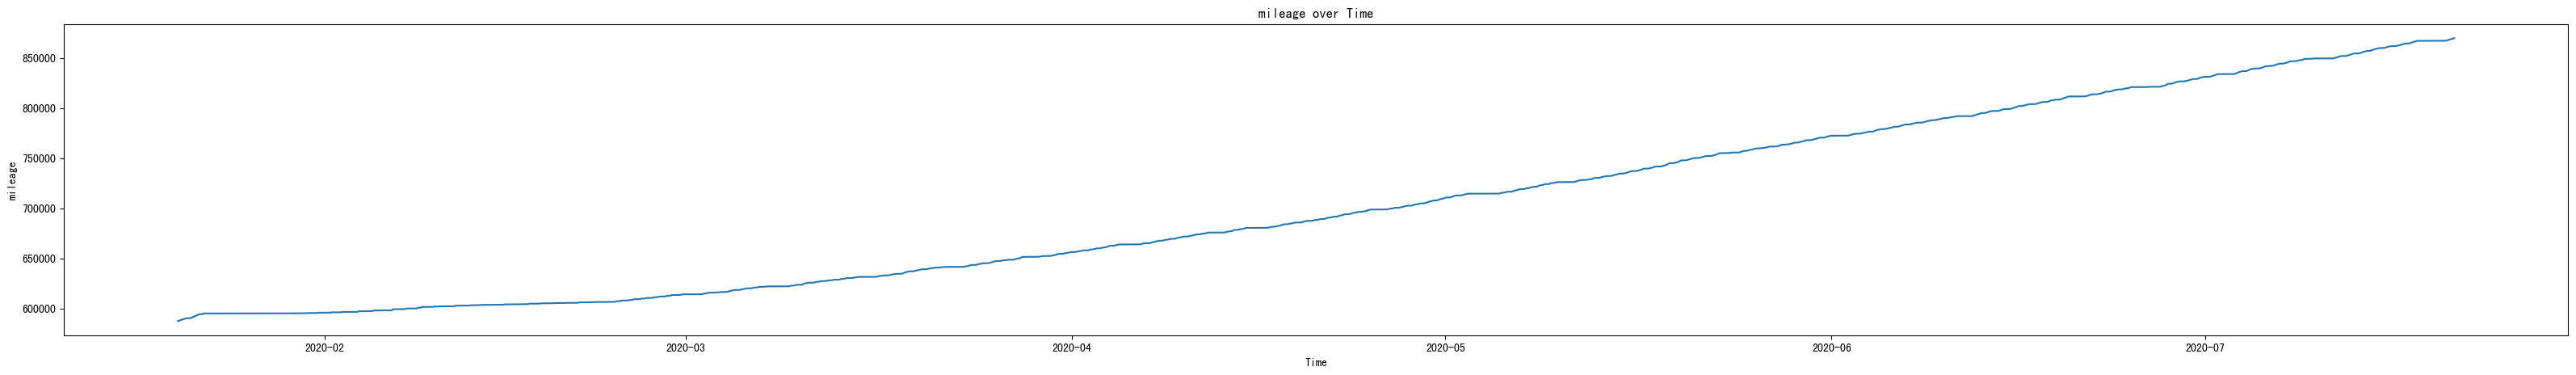

--------------------------------------------------
'mileage' 有 0 个缺失值
'mileage' 的缺失值占比为 0.00%
--------------------------------------------------
有效值范围为 [0, 9999999]
'mileage' 共有 0 个范围外值


In [20]:
fc.analyze_column(data, 'mileage',0, 9999999)

In [21]:
#检查mileage是否每个后面的值都大于等于前面的值

def check_mileage_order(data):
    mileage_values = data['mileage'].values
    for i in range(1, len(mileage_values)):
        if mileage_values[i] < mileage_values[i - 1]:
            return False
    return True

# 使用之前导入的data数据进行检查
if 'mileage' in data.columns:
    is_mileage_ordered = check_mileage_order(data)
    if is_mileage_ordered:
        print("mileage字段的值是递增的或相等的。")
    else:
        print("mileage字段的值存在不满足递增条件的情况。")
else:
    print("数据中不存在mileage字段。")


mileage字段的值是递增的或相等的。


## 电池字段分析
包括

总体特征 ： 总电压 总电流 soc 绝缘阻值 DC-DC状态

单体电池特征：

单体温度探针特征：

### total_volt	
总电压：有效值范围： 0～10000（表示 0V～1000V），最小计量单元： 0.1V，“0xFF,0xFE”表示异常，“0xFF,0xFF”表示无效

数据类型为 int64
--------------------------------------------------
count    671644.000000
mean       3682.797090
std         167.088681
min           0.000000
25%        3530.000000
50%        3683.000000
75%        3822.000000
max        4030.000000
Name: total_volt, dtype: float64
--------------------------------------------------


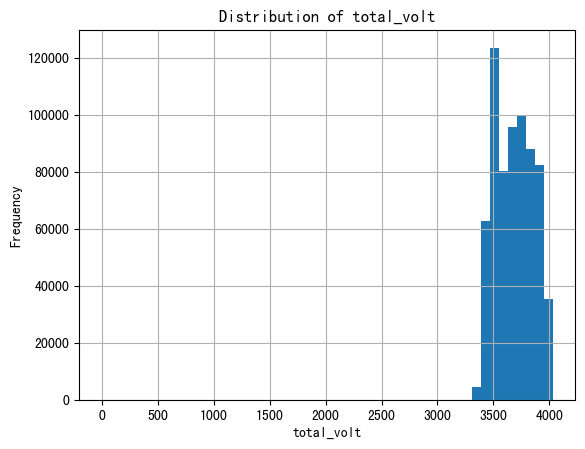

--------------------------------------------------


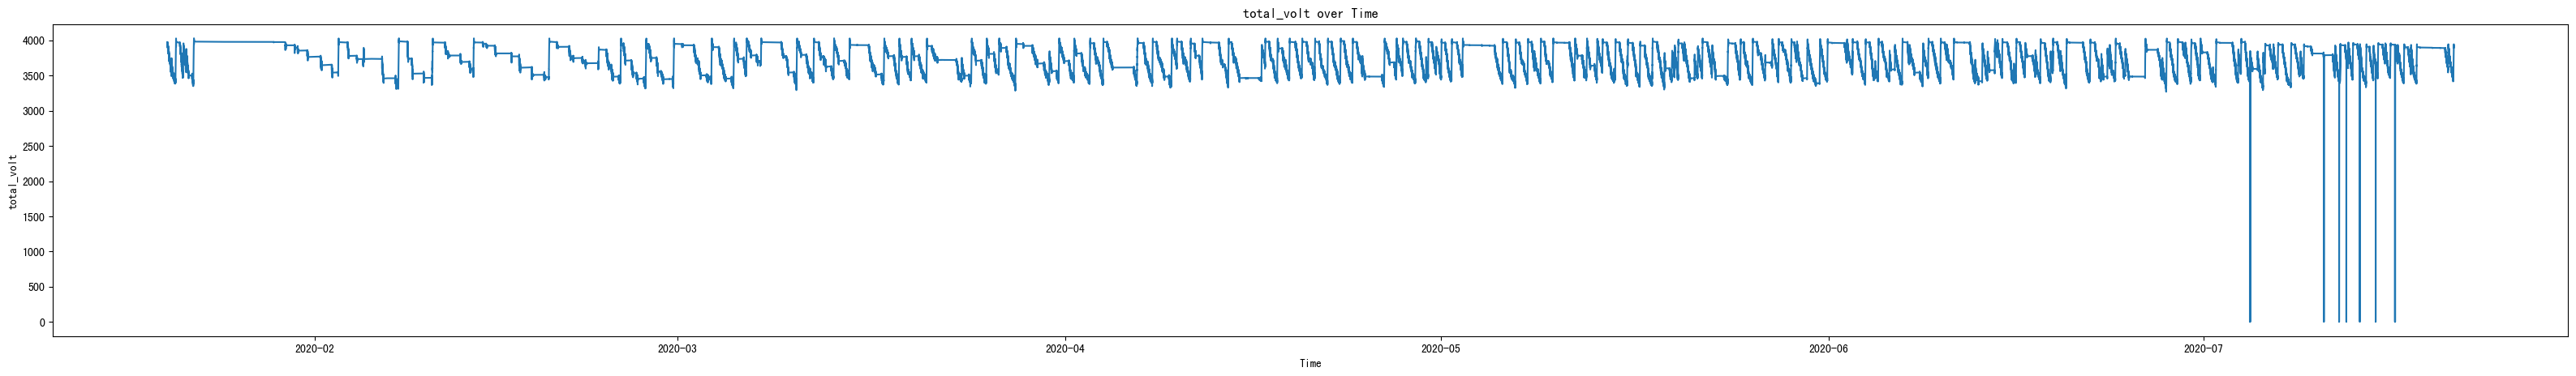

--------------------------------------------------
'total_volt' 有 0 个缺失值
'total_volt' 的缺失值占比为 0.00%
--------------------------------------------------
有效值范围为 [0, 10000]
'total_volt' 共有 0 个范围外值


In [22]:
fc.analyze_column(data, 'total_volt',0, 10000 )

In [24]:

data[data['total_volt']<3000]

,speed,vehicle_state,charging_status,total_volt,total_current,mileage,standard_soc,cell_volt_list,max_cell_volt,max_volt_cell_id,...,cell_temp_list,gear,max_volt_num,min_volt_num,max_temp_num,min_temp_num,alarm_info,驱动力,制动力,挡位
time,,,,,,,,,,,,,,,,,,,,,
2020-07-04 16:34:06,0,2.0,3,0,0,838769,40,1:3635_3650_3650_3650_3650_3636_3637_3635_3636...,3650,2,...,75_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_72_72_72_...,15,1,1,1,1,0,0,0,9
2020-07-04 17:15:06,0,2.0,3,0,0,838769,83,1:4014_3650_3650_3650_3650_4015_4017_4014_4015...,4017,7,...,73_0_0_0_0_0_0_0_0_0_0_0_0_0_73_73_72_72_72_72...,15,1,1,1,1,0,0,0,9
2020-07-10 14:37:48,0,2.0,3,0,0,849440,86,1:3990_3650_3650_3650_3650_3989_3992_3988_3988...,3992,7,...,70_0_0_0_0_0_0_0_0_0_0_0_0_0_70_70_70_70_70_70...,15,1,1,1,1,0,0,0,9
2020-07-11 19:49:26,0,2.0,3,0,0,851524,48,1:3657_3650_3650_3650_3650_3660_3660_3659_3659...,3660,6,...,75_0_0_0_0_0_0_0_0_0_71_71_71_70_71_70_71_71_7...,15,1,1,1,1,0,0,0,9
2020-07-12 09:40:12,0,2.0,3,0,0,852293,85,1:3982_3650_3650_3650_3650_3982_3985_3980_3981...,3985,7,...,72_0_0_0_0_0_0_0_0_0_0_0_71_70_71_70_70_70_71_...,15,1,1,1,1,0,0,0,9
2020-07-13 11:30:51,0,2.0,3,0,0,854978,78,1:3909_3907_3650_3650_3650_3650_3912_3908_3908...,3915,16,...,75_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_71_71_72_71_7...,15,1,1,1,1,0,0,0,9
2020-07-14 17:55:07,0,2.0,3,0,0,859029,75,1:3881_3650_3650_3650_3650_3881_3884_3878_3880...,3884,7,...,77_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_72_71_72_72_7...,15,1,1,1,1,0,0,0,9
2020-07-16 06:55:24,0,2.0,3,0,0,861690,98,1:4146_3650_3650_3650_3650_4145_4147_4144_4143...,4147,7,...,70_0_0_0_0_0_0_0_0_0_69_70_70_69_70_69_69_69_7...,15,1,1,1,1,0,0,0,9
2020-07-16 07:15:44,0,2.0,3,0,0,861698,98,1:4139_3650_3650_3650_3650_4138_4141_4137_4137...,4141,7,...,70_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_69_69_70_70_7...,15,1,1,1,1,0,0,0,9


分析: 有异常值，待处理，用单体电池电压相加补充

### total_current
有效值范围： 0～20000（偏移量 1000A，表示-1000A～+1000A），最小计量单元： 0.1A，“0xFF,0xFE”表示异常，“0xFF,0xFF”表示无效。

数据类型为 int64
--------------------------------------------------
count    671644.000000
mean         -0.149439
std         337.087244
min       -1782.000000
25%           0.000000
50%          16.000000
75%          76.000000
max        2464.000000
Name: total_current, dtype: float64
--------------------------------------------------


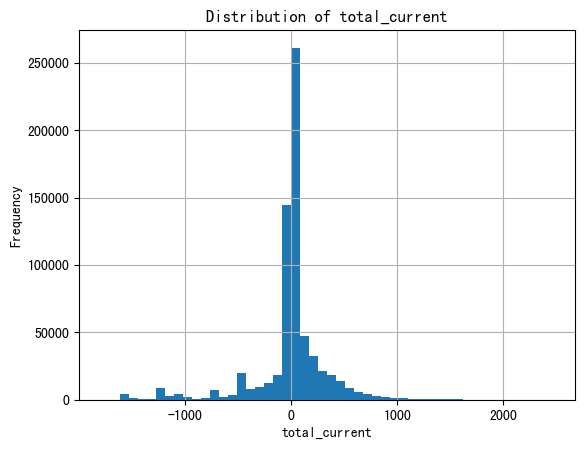

--------------------------------------------------


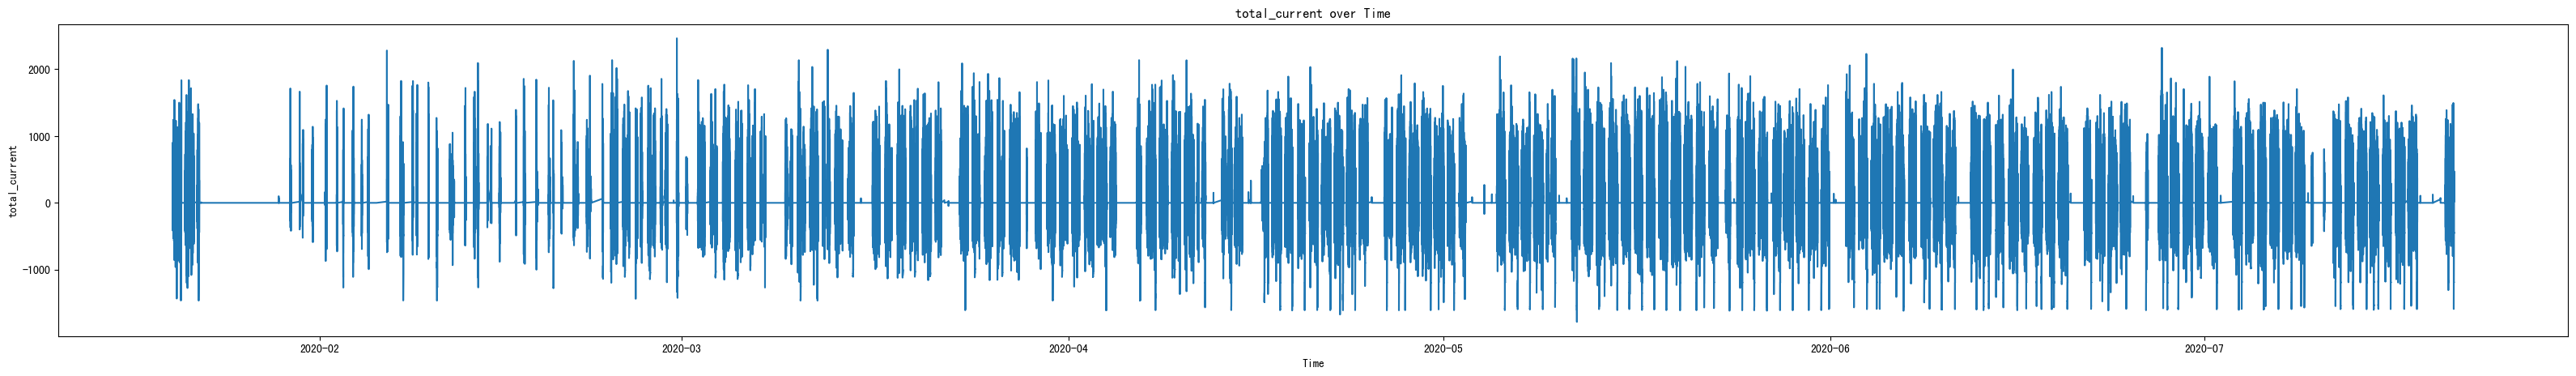

--------------------------------------------------
'total_current' 有 0 个缺失值
'total_current' 的缺失值占比为 0.00%
--------------------------------------------------
有效值范围为 [-10000, 10000]
'total_current' 共有 0 个范围外值


In [25]:
fc.analyze_column(data, 'total_current',-10000, 10000)

### standard_soc
soc:有效值范围：0～100（表示 0%～100%），最小计量单元：1%，“0xFE”表示异常，“0xFF”表示无效

数据类型为 int64
--------------------------------------------------
count    671644.000000
mean         67.434453
std          19.685158
min           0.000000
25%          53.000000
50%          70.000000
75%          84.000000
max         100.000000
Name: standard_soc, dtype: float64
--------------------------------------------------


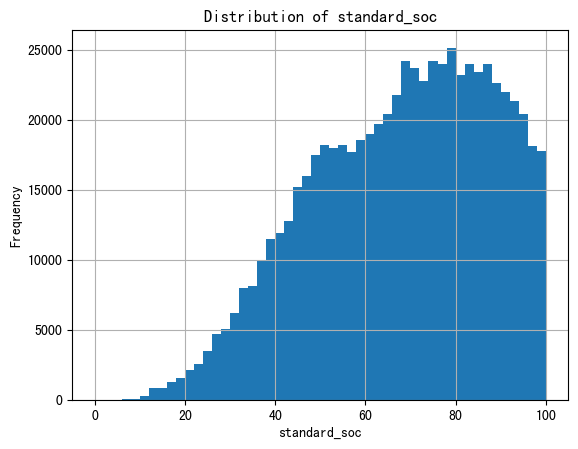

--------------------------------------------------


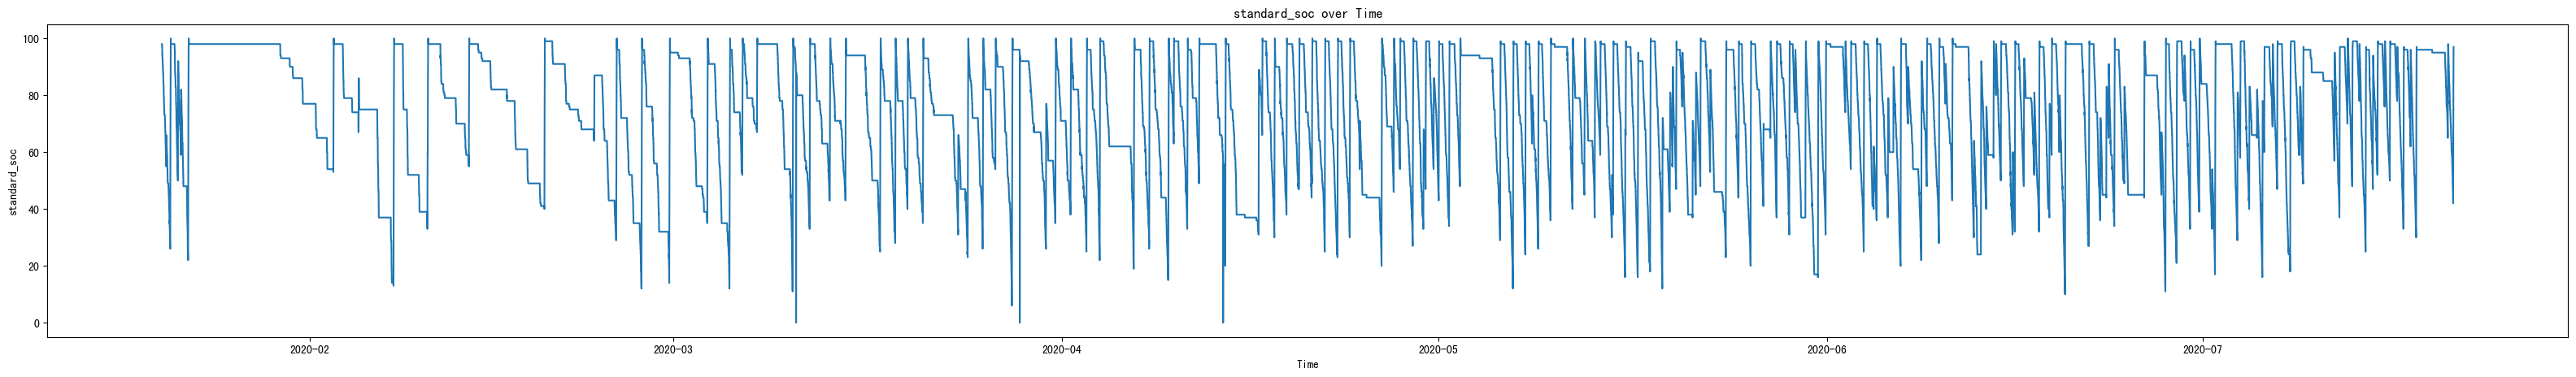

--------------------------------------------------
'standard_soc' 有 0 个缺失值
'standard_soc' 的缺失值占比为 0.00%
--------------------------------------------------
有效值范围为 [0, 100]
'standard_soc' 共有 0 个范围外值


In [26]:
fc.analyze_column(data, 'standard_soc',0, 100)

In [27]:
#删除'standard_soc'为0的值
data = data[data['standard_soc'] != 0]

In [28]:
## Calculate the change in SOC
data['soc_diff'] = data['standard_soc'].diff()

数据类型为 float64
--------------------------------------------------
count    671640.000000
mean         -0.000001
std           0.190410
min          -1.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: soc_diff, dtype: float64
--------------------------------------------------


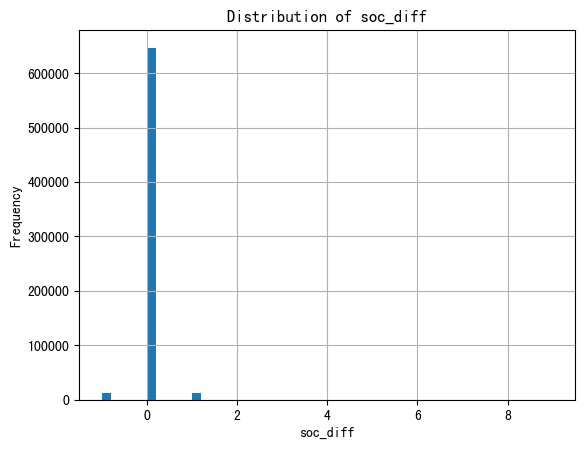

--------------------------------------------------


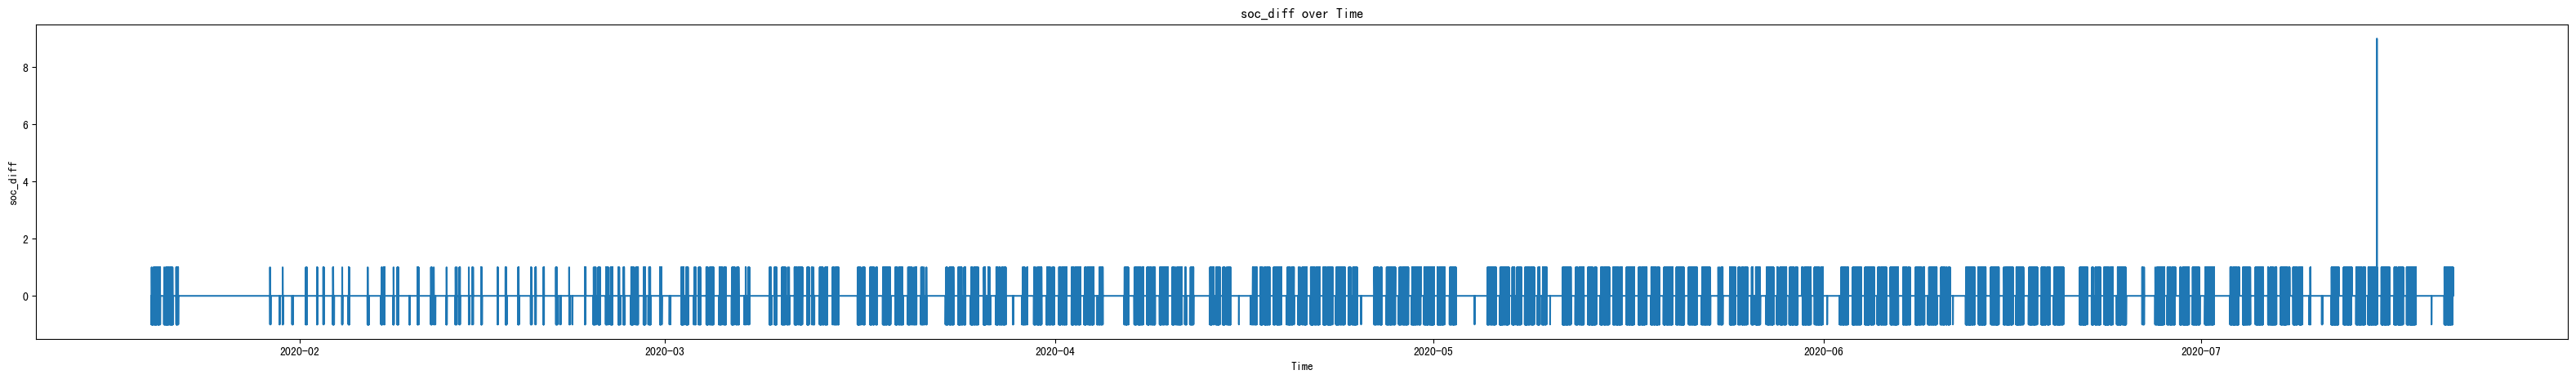

--------------------------------------------------
'soc_diff' 有 1 个缺失值
'soc_diff' 的缺失值占比为 0.00%


In [29]:
fc.analyze_column(data, 'soc_diff')

### charging_status（衍生特征）
充电状态：0x01：停车充电；0x02：行驶充电；0x03：未充电状态；0x04：充电完成；“0xFE”表示异常，“0xFF”表示无效

数据类型为 int64
--------------------------------------------------
count    671641.000000
mean          2.856796
std           0.518680
min           1.000000
25%           3.000000
50%           3.000000
75%           3.000000
max           4.000000
Name: charging_status, dtype: float64
--------------------------------------------------


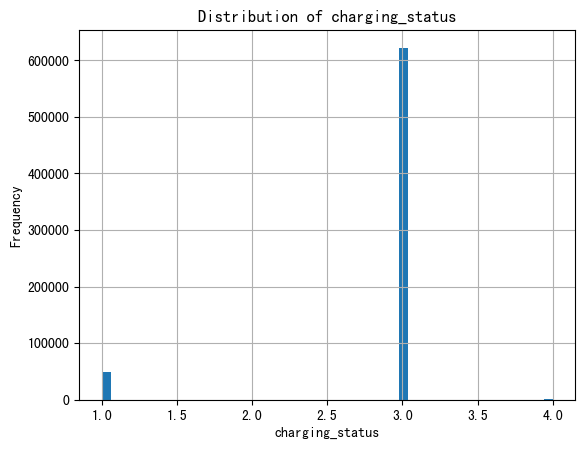

--------------------------------------------------


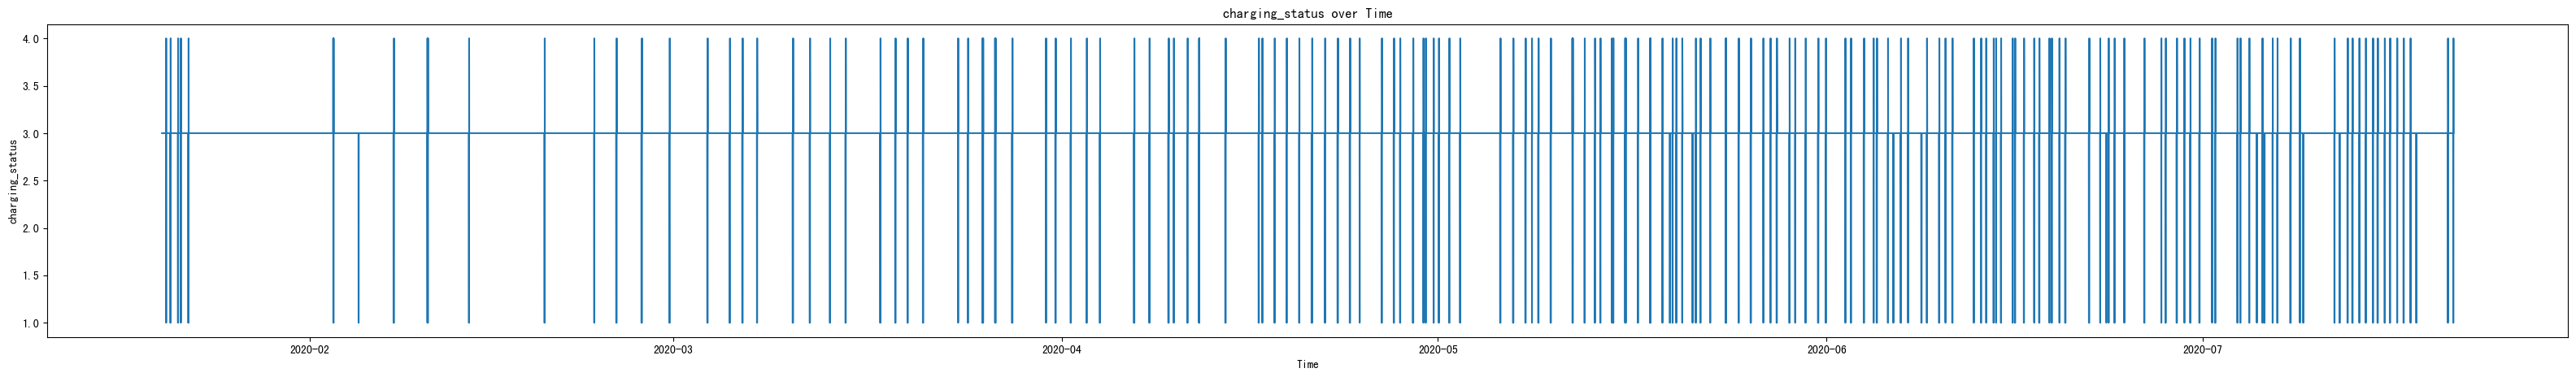

--------------------------------------------------
'charging_status' 有 0 个缺失值
'charging_status' 的缺失值占比为 0.00%
--------------------------------------------------
有效值范围为 [0, 4]
'charging_status' 共有 0 个范围外值


In [30]:
fc.analyze_column(data, 'charging_status',0,4)

分析：标签类数据，需要检查是否准确

### cell_volt_list 
单体电池电压列表：有效值：0~15000，单位0.001V

In [31]:
fc.analyze_column(data, 'cell_volt_list')

数据类型为 object
--------------------------------------------------
'cell_volt_list' 有 0 个缺失值
'cell_volt_list' 的缺失值占比为 0.00%


In [32]:
def check_systems(data: pd.DataFrame, column: str):
    # 定义一个函数来检查一个字符串中":"的数量
    def count_colon(s):
        return s.count(":")
    
    # 使用apply函数检查整个列
    data['colon_count'] = data[column].apply(count_colon)
    
    # 现在，colon_count列中的每个值都是一个整数，表示对应的cell_volt_list值中":"的数量
    # 使用max函数来检查最大的数量
    max_colon_count = data['colon_count'].max()
    
    # 如果最大数量为1，打印"只有一个系统"，否则打印"有多个系统"
    if max_colon_count == 1:
        print("只有一个系统")
    else:
        print("有多个系统")
    
    data= data.drop('colon_count', axis=1)
    return data

# 使用函数
data = check_systems(data, 'cell_volt_list')

只有一个系统


分析：电池只有一个子系统

In [33]:
def process_volt_string(volt_string):
    volt_string = volt_string.split(":")[1]  # 去掉前面的"1:"
    volt_list = volt_string.split("_")  # 分割字符串
    volt_list = [int(volt) for volt in volt_list]  # 转换为整数列表
    volt_list = [volt for volt in volt_list]  # 转换为电压值
    return volt_list

# 然后使用apply函数处理整个列
data['cell_volt_list'] = data['cell_volt_list'].apply(process_volt_string)

In [35]:
# 计算每个列表的长度
data['volt_list_length'] = data['cell_volt_list'].apply(len)

# 检查是否所有的长度
all_have_volt = all(data['volt_list_length'] == attributes_results["sing_volt_num"])
if all_have_volt:
    print("所有记录都有",attributes_results["sing_volt_num"],"个电压值")
else:
    print("有记录没有",attributes_results["sing_volt_num"],"个电压值")
data= data.drop('volt_list_length', axis=1)

所有记录都有 95 个电压值


In [36]:
def find_and_print_out_of_range_rows(data, column_name,lower_bound, upper_bound):
    """
    找出包含不在范围内的数据值的行，并打印出这些行及行数。

    参数:
        data (DataFrame): 包含电压值数据的DataFrame。

    返回:
        None
    """
    # 找出包含不在范围内的数据值的行
    out_of_range_rows = data[data[column_name].apply(lambda volt_list: any(volt < lower_bound or volt > upper_bound for volt in volt_list))]

    # 获取行数
    num_rows = out_of_range_rows.shape[0]

    # 打印行数
    if num_rows == 0:
        print("没有异常或无效值")
    else:
        print(f"异常或无效行数有: {num_rows} 行")
        # 打印出这些行
        print(out_of_range_rows)

In [37]:
find_and_print_out_of_range_rows(data, 'cell_volt_list',0, 15)

没有异常或无效值


#### max_cell_volt:衍生特征
电池单体电压最高值：有效值范围：0～15 000（表示 0V～15V），最小计量单元：0.001V，“0xFE，0xFE”表示异常，“0xFF ，0xFF”表示无效

数据类型为 int64
--------------------------------------------------
count    671641.000000
mean       3885.130069
std         176.712627
min        3457.000000
25%        3722.000000
50%        3886.000000
75%        4033.000000
max        4256.000000
Name: max_cell_volt, dtype: float64
--------------------------------------------------


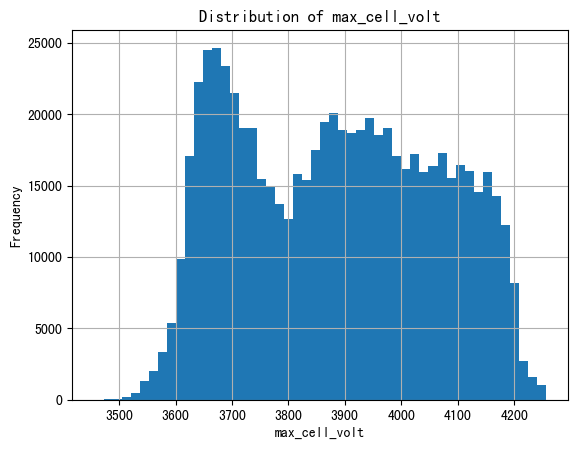

--------------------------------------------------


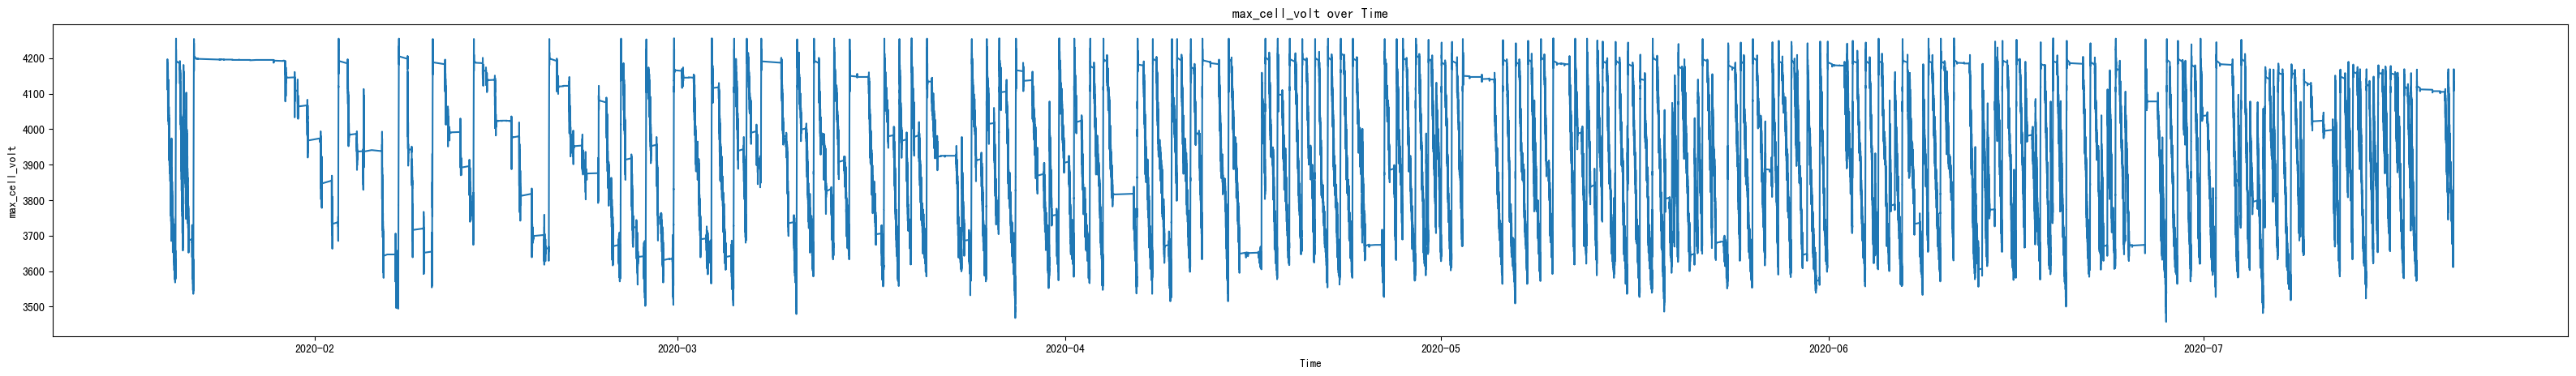

--------------------------------------------------
'max_cell_volt' 有 0 个缺失值
'max_cell_volt' 的缺失值占比为 0.00%
--------------------------------------------------
有效值范围为 [0, 15000]
'max_cell_volt' 共有 0 个范围外值
--------------------------------------------------
需要放缩，放缩比例为 0.001
列放缩完毕，数据类型为 float64


In [39]:
fc.analyze_column(data, 'max_cell_volt',0, 15000,0.001)

#### max_volt_cell_id衍生特征
最高电压电池：有效值范围： 1～250，“0xFE”表示异常，“0xFF”表示无效。


数据类型为 int64
--------------------------------------------------
count    671641.000000
mean         80.632028
std          25.123989
min           1.000000
25%          78.000000
50%          92.000000
75%          95.000000
max          95.000000
Name: max_volt_cell_id, dtype: float64
--------------------------------------------------


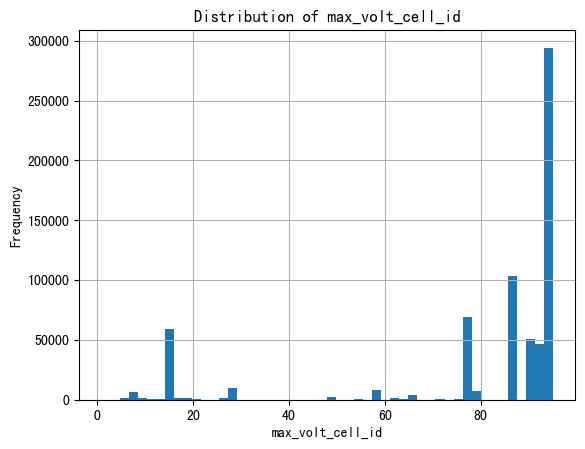

--------------------------------------------------


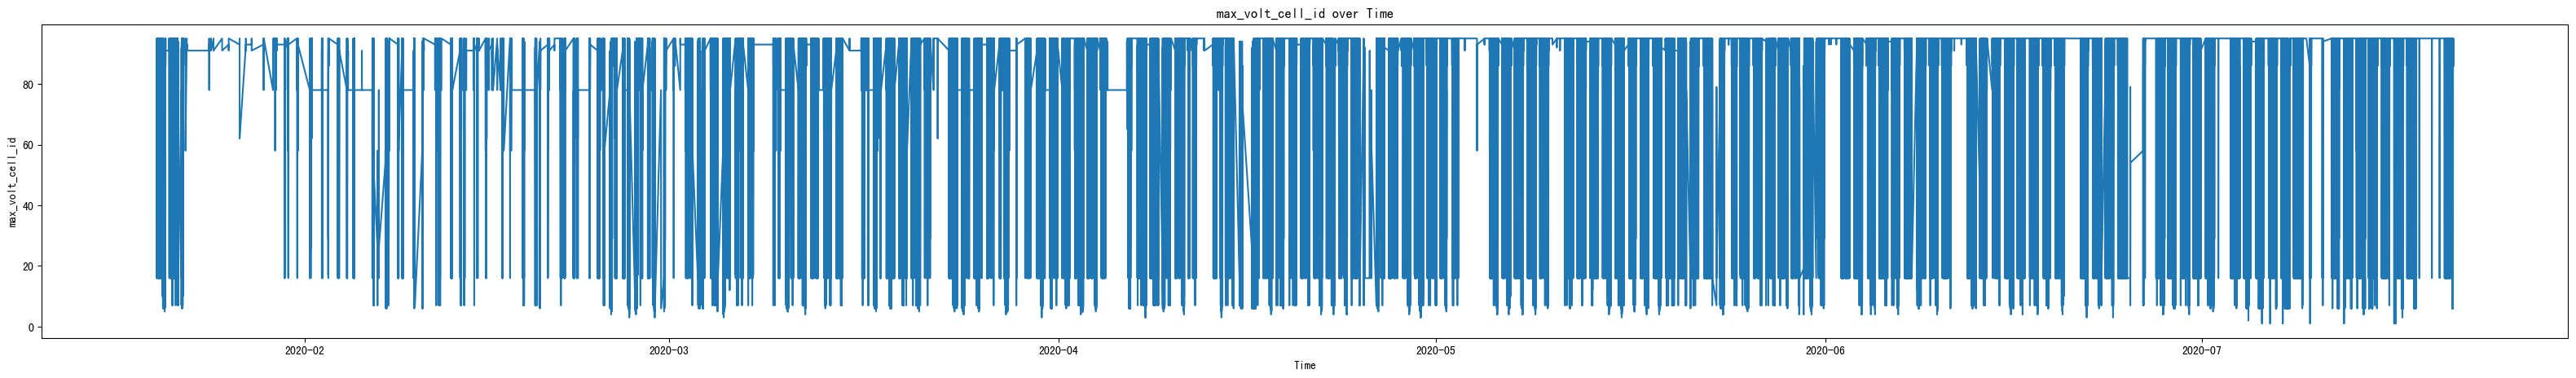

--------------------------------------------------
'max_volt_cell_id' 有 0 个缺失值
'max_volt_cell_id' 的缺失值占比为 0.00%
--------------------------------------------------
有效值范围为 [1, 250]
'max_volt_cell_id' 共有 0 个范围外值


In [40]:
fc.analyze_column(data, 'max_volt_cell_id',1, 250)

#### min_cell_volt:衍生特征
有效值范围：0～15 000（表示 0V～15V），最小计量单元：0.001V，“0xFF，0xFE”表示异常，“0xFF ，0xFF”表示无效

数据类型为 int64
--------------------------------------------------
count    671641.000000
mean       3869.321611
std         174.506320
min        3399.000000
25%        3710.000000
50%        3869.000000
75%        4016.000000
max        4236.000000
Name: min_cell_volt, dtype: float64
--------------------------------------------------


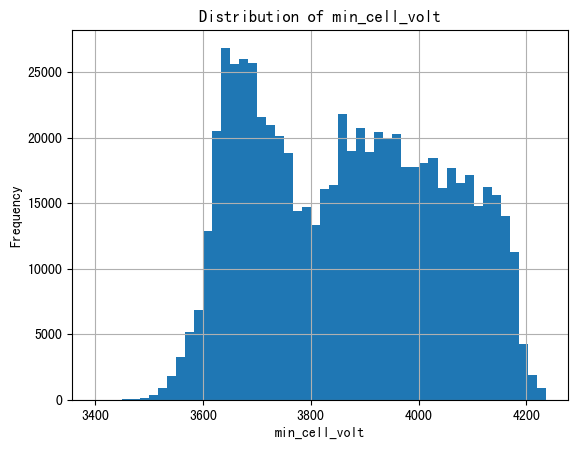

--------------------------------------------------


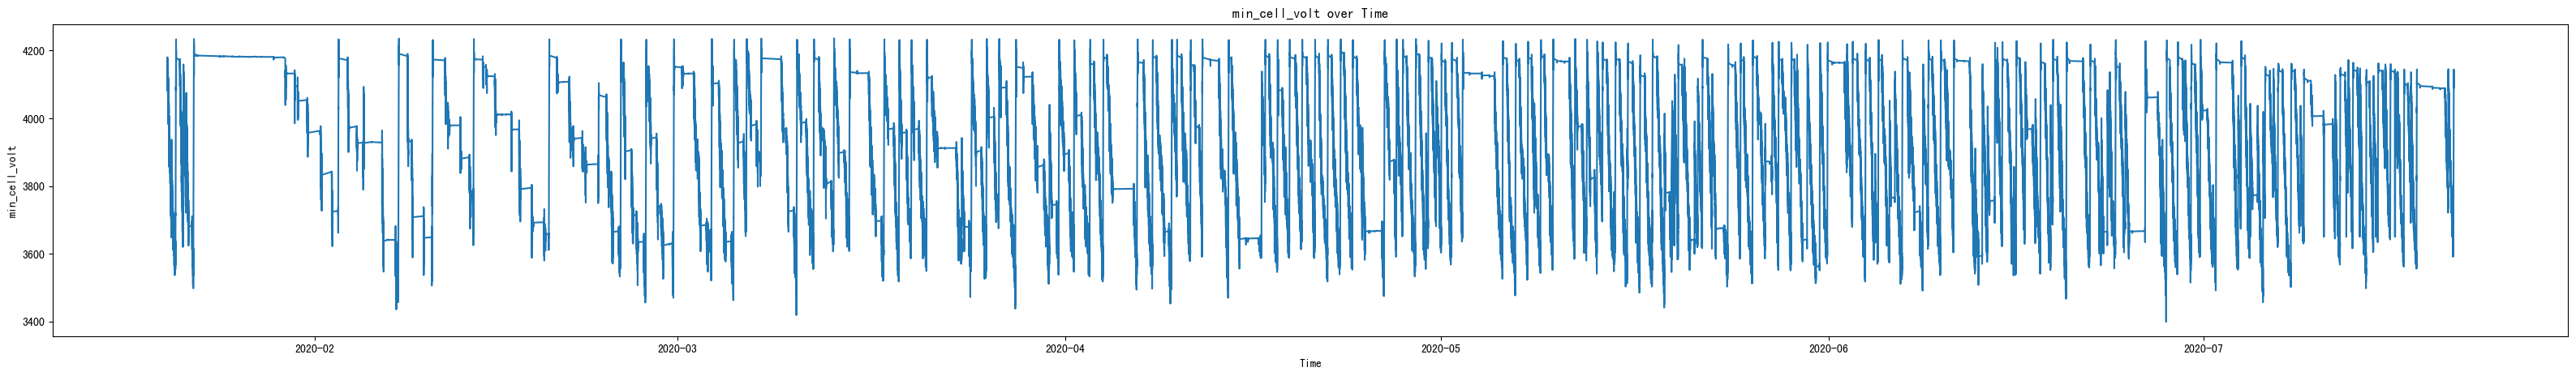

--------------------------------------------------
'min_cell_volt' 有 0 个缺失值
'min_cell_volt' 的缺失值占比为 0.00%
--------------------------------------------------
有效值范围为 [0, 15000]
'min_cell_volt' 共有 0 个范围外值
--------------------------------------------------
需要放缩，放缩比例为 0.001
列放缩完毕，数据类型为 float64


In [41]:
fc.analyze_column(data, 'min_cell_volt',0, 15000,0.001)

#### min_cell_volt_id衍生特征
最低电压电池：有效值范围： 1～250，“0xFE”表示异常，“0xFF”表示无效。

数据类型为 int64
--------------------------------------------------
count    671641.000000
mean         33.867980
std          17.778888
min           1.000000
25%          29.000000
50%          32.000000
75%          32.000000
max          95.000000
Name: min_cell_volt_id, dtype: float64
--------------------------------------------------


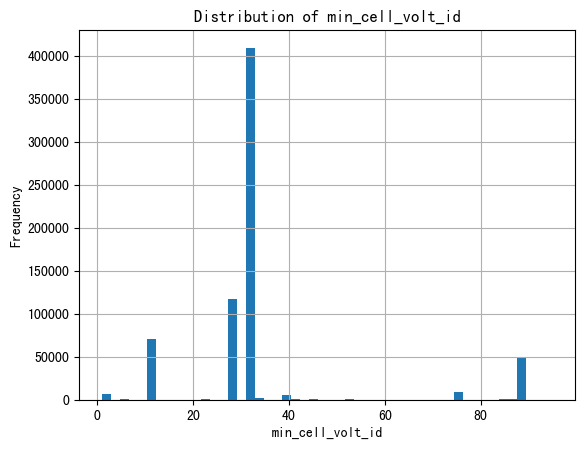

--------------------------------------------------


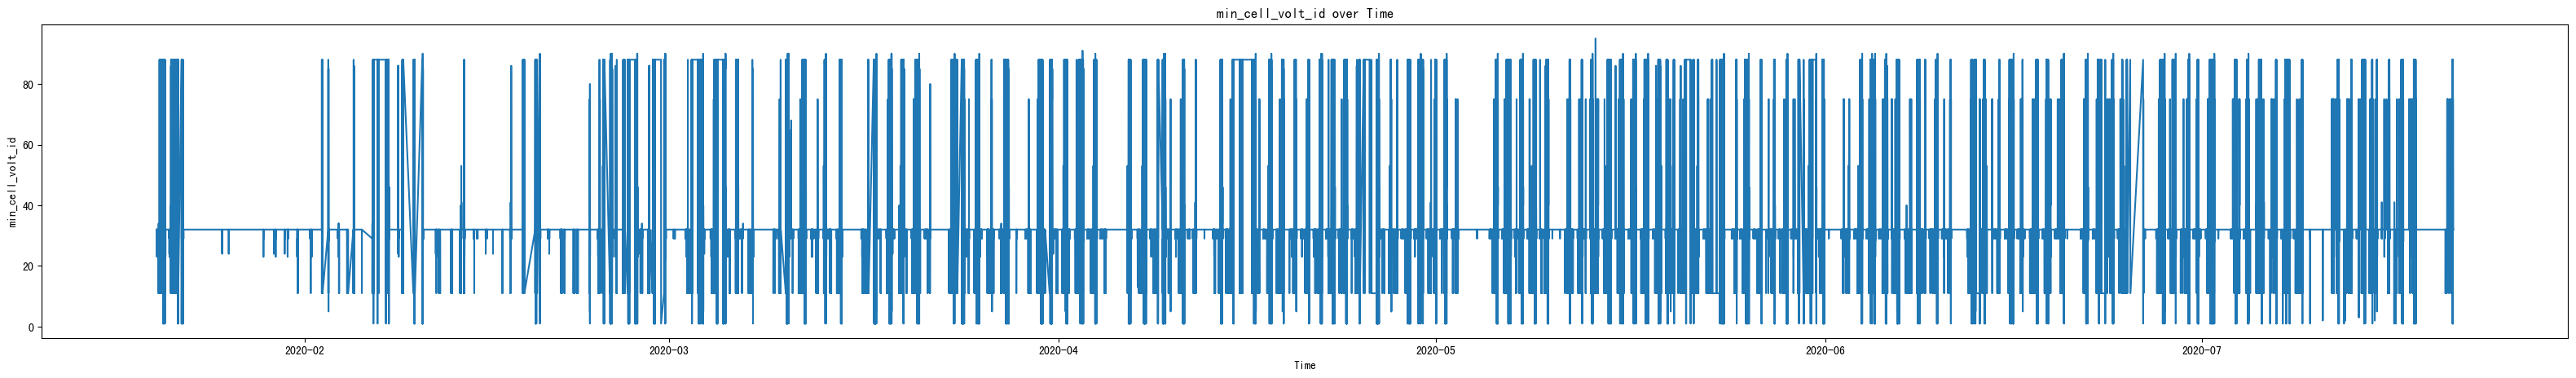

--------------------------------------------------
'min_cell_volt_id' 有 0 个缺失值
'min_cell_volt_id' 的缺失值占比为 0.00%
--------------------------------------------------
有效值范围为 [1, 250]
'min_cell_volt_id' 共有 0 个范围外值


In [42]:
fc.analyze_column(data, 'min_cell_volt_id',1, 250)

In [43]:
def find_extreme_and_index(lst, mode='max'):
    if mode == 'max':
        value = max(lst)
    elif mode == 'min':
        value = min(lst)
    else:
        raise ValueError("Mode must be 'max' or 'min'")
    index = lst.index(value)+1
    return value, index

def check_volt_consistency(data: pd.DataFrame):
    data['max_volt_and_index'] = data['cell_volt_list'].apply(find_extreme_and_index, mode='max')
    data['min_volt_and_index'] = data['cell_volt_list'].apply(find_extreme_and_index, mode='min')
    
    data['max_cell_volt_real'] = data['max_volt_and_index'].apply(lambda x: x[0])
    data['max_volt_cell_id_real'] = data['max_volt_and_index'].apply(lambda x: x[1])
    
    data['min_cell_volt_real'] = data['min_volt_and_index'].apply(lambda x: x[0])
    data['min_cell_volt_id_real'] = data['min_volt_and_index'].apply(lambda x: x[1])
    
    max_volt_not_equal = (data['max_cell_volt_real'] != data['max_cell_volt'])
    max_volt_not_equal_count = max_volt_not_equal.sum()
    
    min_volt_not_equal = (data['min_cell_volt_real'] != data['min_cell_volt'])
    min_volt_not_equal_count = min_volt_not_equal.sum()
    
    max_id_not_equal = (data['max_volt_cell_id_real'] != data['max_volt_cell_id'])
    max_id_not_equal_count = max_id_not_equal.sum()

    min_id_not_equal = (data['min_cell_volt_id_real'] != data['min_cell_volt_id'])
    min_id_not_equal_count = min_id_not_equal.sum()

    if max_volt_not_equal_count > 0 or max_id_not_equal_count > 0 or min_volt_not_equal_count > 0 or min_id_not_equal_count > 0:
        print(f"警告：存在不相等的情况。")
        print(f"不相等的最大电压值数量：{max_volt_not_equal_count}")
        print(f"不相等的最小电压值数量：{min_volt_not_equal_count}")
        print(f"不相等的最大电压单元ID数量：{max_id_not_equal_count}")
        print(f"不相等的最小电压单元ID数量：{min_id_not_equal_count}")
        return data
    else:
        print("单体电压数据一致性检查完毕，数据一致！")
        # 删除这个函数里新创造的这些列
        data = data.drop(['max_volt_and_index', 'max_cell_volt_real', 'max_volt_cell_id_real', 'min_volt_and_index', 'min_cell_volt_real', 'min_cell_volt_id_real'], axis=1)
        return data


In [44]:
data = check_volt_consistency(data)

单体电压数据一致性检查完毕，数据一致！


### cell_temp_list
单体电池温度值列表:有效值范围：0～250 （数值偏移量 40℃，表示-40℃～+210℃），最小计量单元：1℃，“0xFE”表示异常，“0xFF”表示无效

In [45]:
fc.analyze_column(data, 'cell_temp_list')

数据类型为 object
--------------------------------------------------
'cell_temp_list' 有 0 个缺失值
'cell_temp_list' 的缺失值占比为 0.00%


In [46]:
def process_temp_string(temp_string):
    temp_list = temp_string.split("_")  # 分割字符串
    temp_list = [int(temp) for temp in temp_list]  # 转换为整数列表
    return temp_list

# 然后使用apply函数处理整个列
data['cell_temp_list'] = data['cell_temp_list'].apply(process_temp_string)

In [47]:
# 计算每个列表的长度
data['temp_list_length'] = data['cell_temp_list'].apply(len)

# 检查是否所有的长度
all_have_temp = all(data['temp_list_length'] == attributes_results["sing_temp_num"])
if all_have_temp:
    print("所有记录都有",attributes_results["sing_temp_num"],"个温度值")
else:
    print("有记录没有",attributes_results["sing_temp_num"],"个温度值")
data= data.drop('temp_list_length', axis=1)

所有记录都有 34 个温度值


In [48]:
find_and_print_out_of_range_rows(data, 'cell_temp_list',0, 250)

异常或无效行数有: 10 行
                     speed  vehicle_state  charging_status  total_volt   
time                                                                     
2020-01-24 09:32:25    0.0            2.0                3       397.9  \
2020-01-27 18:38:14    0.0            2.0                3       397.8   
2020-03-14 13:14:57    0.0            2.0                3       356.9   
2020-04-13 10:29:49    0.0            2.0                3       376.2   
2020-05-06 18:02:45    0.0            2.0                3       349.8   
2020-05-26 09:21:27    0.0            2.0                3       386.7   
2020-05-28 07:45:01    0.0            2.0                3       395.5   
2020-06-02 20:07:22    0.0            2.0                3       363.0   
2020-06-28 12:50:13    0.0            2.0                3       367.3   
2020-07-11 19:46:35    0.0            2.0                3       347.5   

                     total_current  mileage  standard_soc   
time                               

分析：总共有10行异常数据,等待排查

#### max_temp：衍生特征
最高温度值 有效值范围：0～250（数值偏移量40℃，表示-40℃～210℃），最小计量单元：1℃，“0xFE”表示异常，“0xFF”表示无效

数据类型为 float64
--------------------------------------------------
count    671642.000000
mean         29.480306
std           4.331683
min         -40.000000
25%          26.000000
50%          30.000000
75%          33.000000
max          41.000000
Name: max_temp, dtype: float64
--------------------------------------------------


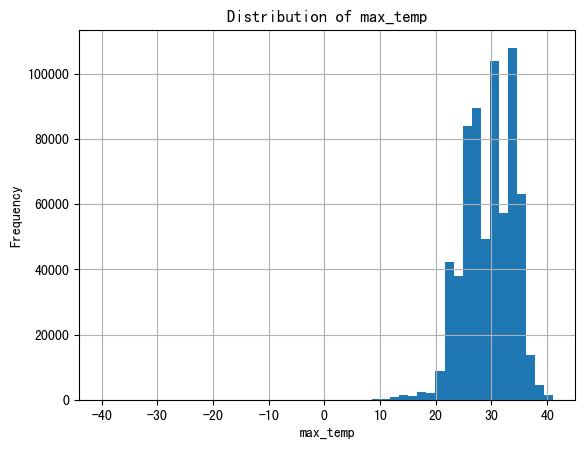

--------------------------------------------------


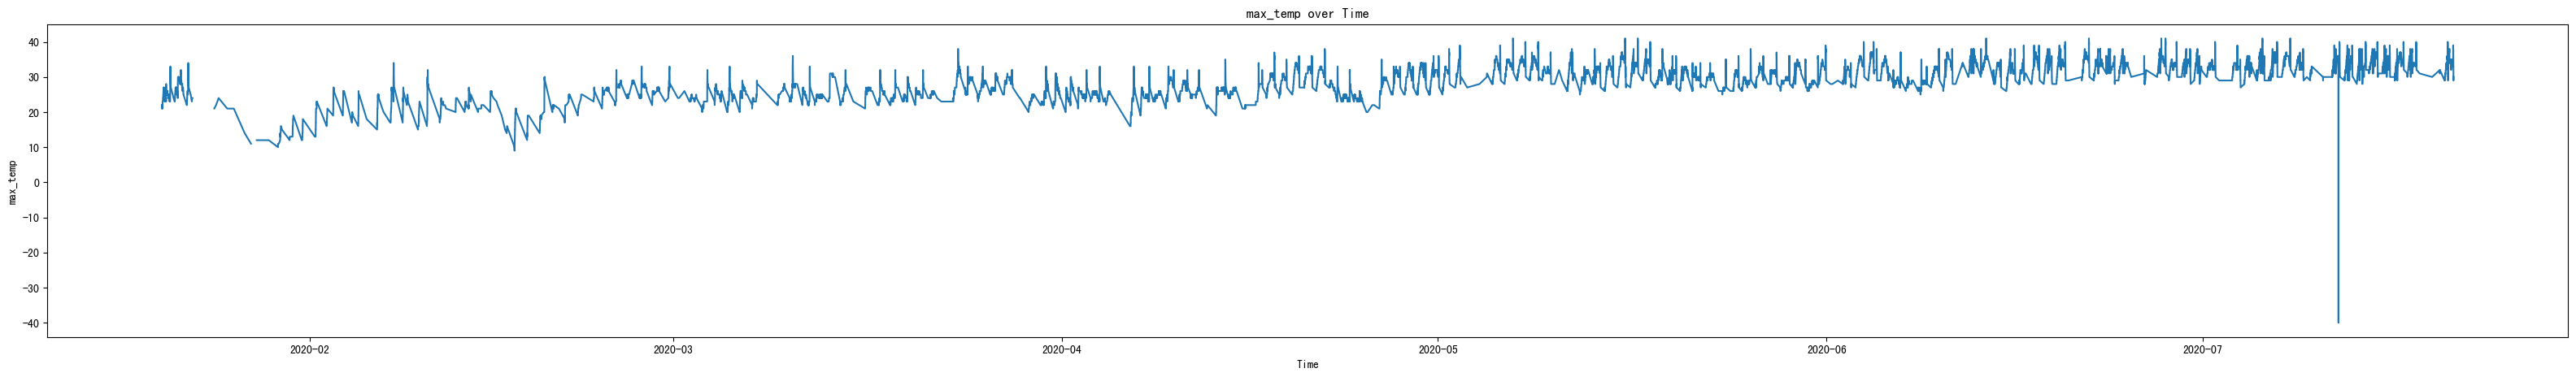

--------------------------------------------------
'max_temp' 有 2 个缺失值
'max_temp' 的缺失值占比为 0.00%
--------------------------------------------------
有效值范围为 [-40, 210]
'max_temp' 共有 0 个范围外值


In [33]:
analyze_column(data, 'max_temp',-40, 210)

In [34]:
#打印max_temp缺失值所在的行
data[data['max_temp'].isnull()]

,speed,vehicle_state,charging_status,total_volt,total_current,mileage,standard_soc,cell_volt_list,max_cell_volt,max_volt_cell_id,...,bat_fault_list,isulate_r,dcdc_stat,cell_temp_list,gear,max_volt_num,min_volt_num,max_temp_num,min_temp_num,alarm_info
time,,,,,,,,,,,,,,,,,,,,,
2020-01-24 09:32:25,0.0,2.0,3,397.9,0.0,59509.7,98,"[4.19, 4.189, 4.191, 4.19, 4.189, 4.189, 4.192...",4.196,91,...,NaN,3766,2,"[255, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, ...",15,1,1,1,1,0
2020-01-27 18:38:14,0.0,2.0,3,397.8,0.0,59509.7,98,"[4.189, 4.188, 4.19, 4.189, 4.187, 4.188, 4.19...",4.195,93,...,NaN,3770,2,"[255, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, ...",15,1,1,1,1,0


分析：有两个异常值，还有一个0值，待排查

#### max_temp_probe_id：衍生特征
最高温度探针
有效值范围： 1～250，“0xFE”表示异常，“0xFF”表示无效。

数据类型为 int64
--------------------------------------------------
count    671644.000000
mean          6.255753
std           9.400506
min           1.000000
25%           1.000000
50%           1.000000
75%          12.000000
max          33.000000
Name: max_temp_probe_id, dtype: float64
--------------------------------------------------


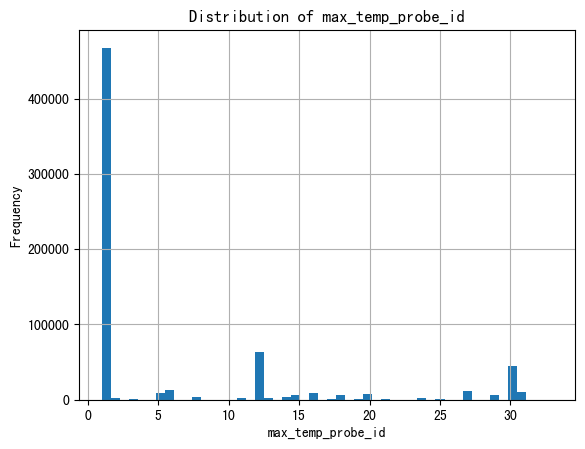

--------------------------------------------------


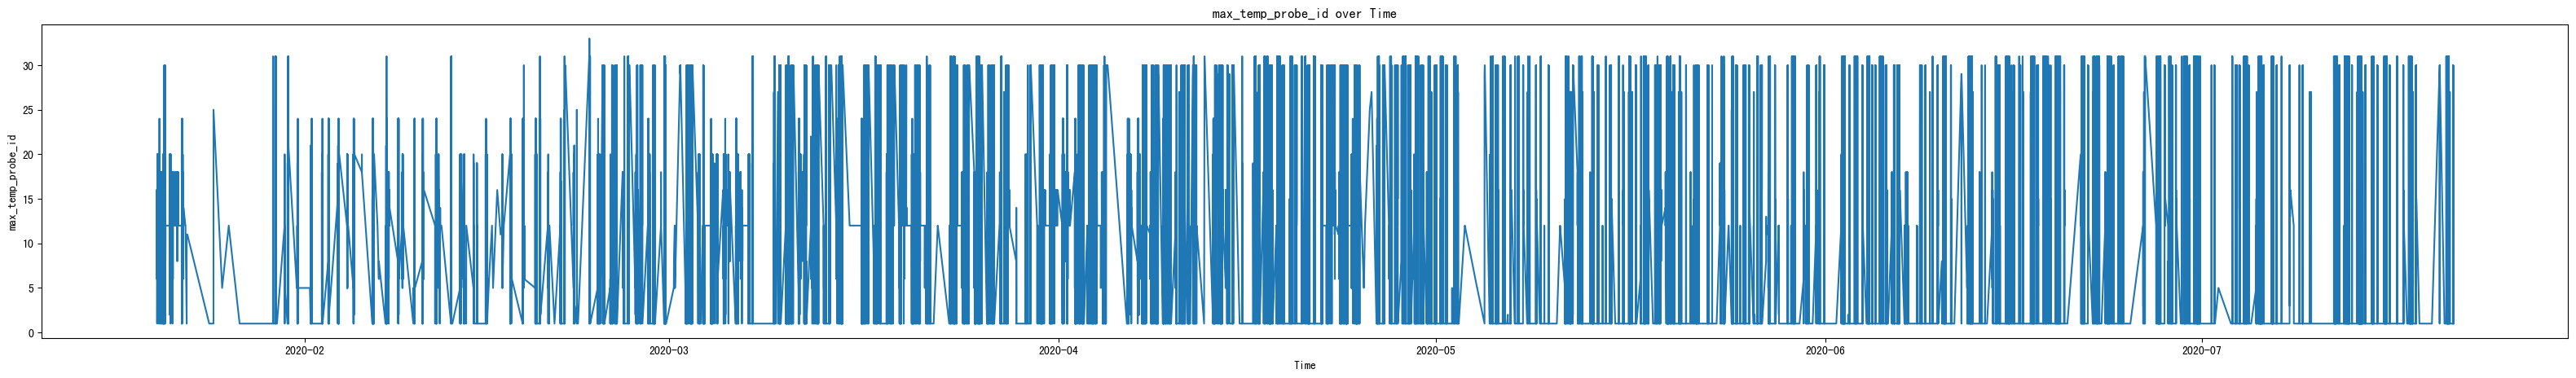

--------------------------------------------------
'max_temp_probe_id' 有 0 个缺失值
'max_temp_probe_id' 的缺失值占比为 0.00%
--------------------------------------------------
有效值范围为 [1, 250]
'max_temp_probe_id' 共有 0 个范围外值


In [35]:
analyze_column(data, 'max_temp_probe_id',1, 250)

#### min_temp  ：衍生特征
最低温度值
有效值范围：0～250（数值偏移量40℃，表示-40℃～210℃），最小计量单元：1℃，“0xFE”表示异常，“0xFF”表示无效

数据类型为 int64
--------------------------------------------------
count    671644.000000
mean         27.150158
std           3.812066
min         -40.000000
25%          24.000000
50%          28.000000
75%          30.000000
max          39.000000
Name: min_temp, dtype: float64
--------------------------------------------------


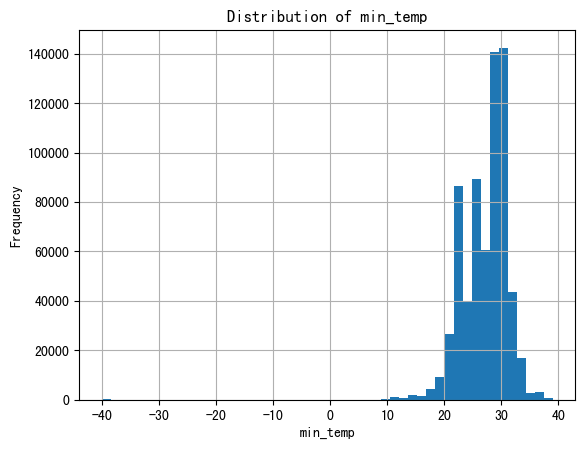

--------------------------------------------------


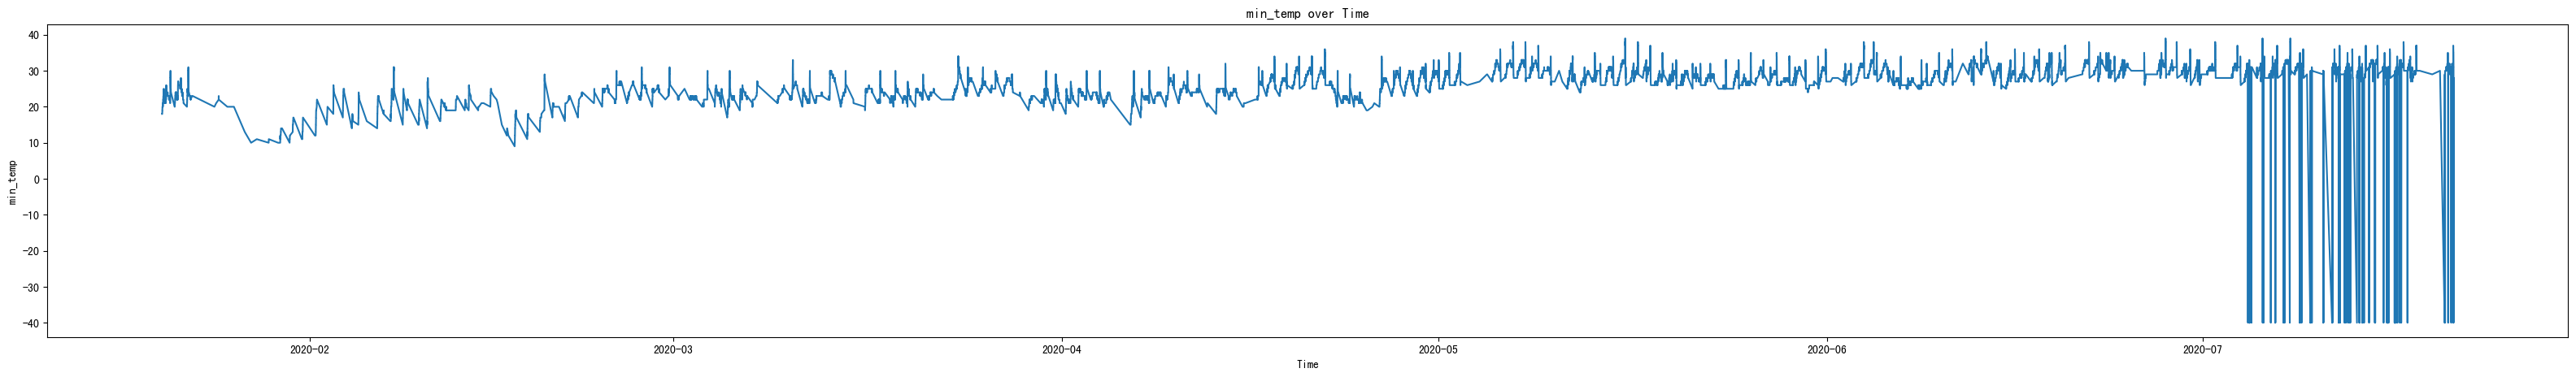

--------------------------------------------------
'min_temp' 有 0 个缺失值
'min_temp' 的缺失值占比为 0.00%
--------------------------------------------------
有效值范围为 [-40, 210]
'min_temp' 共有 0 个范围外值


In [36]:
analyze_column(data, 'min_temp',-40, 210)

分析：图像上有明显的很多异常值

#### min_temp_probe_id：衍生特征
有效值范围： 1～250，“0xFE”表示异常，“0xFF”表示无效。

数据类型为 int64
--------------------------------------------------
count    671644.000000
mean          8.654713
std           7.438562
min           1.000000
25%           4.000000
50%           6.000000
75%          12.000000
max          34.000000
Name: min_temp_probe_id, dtype: float64
--------------------------------------------------


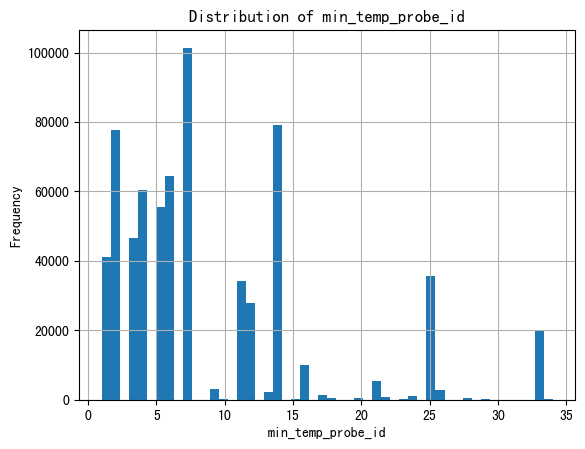

--------------------------------------------------


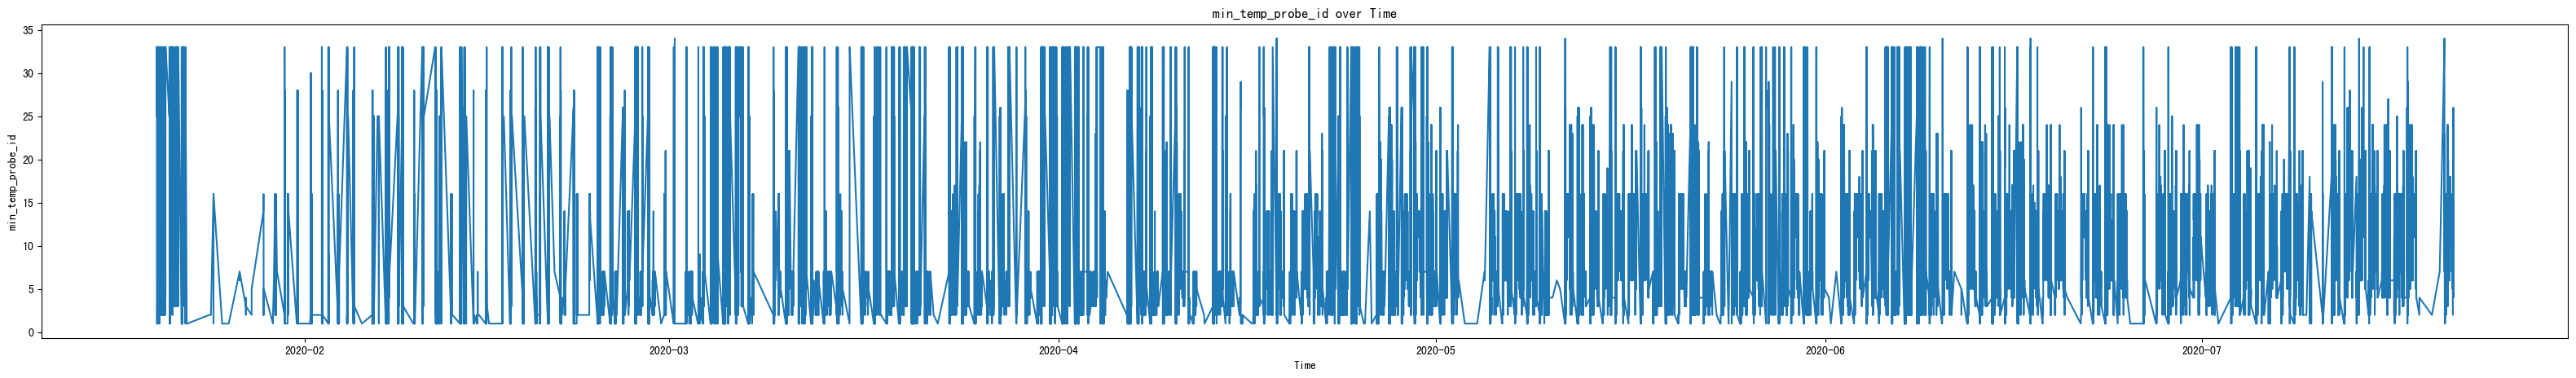

--------------------------------------------------
'min_temp_probe_id' 有 0 个缺失值
'min_temp_probe_id' 的缺失值占比为 0.00%
--------------------------------------------------
有效值范围为 [1, 250]
'min_temp_probe_id' 共有 0 个范围外值


In [37]:
analyze_column(data, 'min_temp_probe_id',1, 250)

In [38]:
def check_temp_consistency(data: pd.DataFrame):
    data['max_temp_and_index'] = data['cell_temp_list'].apply(find_extreme_and_index, mode='max')
    data['min_temp_and_index'] = data['cell_temp_list'].apply(find_extreme_and_index, mode='min')
    
    data['max_temp_real'] = data['max_temp_and_index'].apply(lambda x: x[0])
    data['max_temp_probe_id_real'] = data['max_temp_and_index'].apply(lambda x: x[1])
    
    data['min_temp_real'] = data['min_temp_and_index'].apply(lambda x: x[0])
    data['min_temp_probe_id_real'] = data['min_temp_and_index'].apply(lambda x: x[1])
    
    max_temp_not_equal = (data['max_temp_real'] -40 != data['max_temp'])
    max_temp_not_equal_count = max_temp_not_equal.sum()
    
    min_temp_not_equal = (data['min_temp_real'] -40 != data['min_temp'])
    min_temp_not_equal_count = min_temp_not_equal.sum()
    
    max_id_not_equal = (data['max_temp_probe_id_real'] != data['max_temp_probe_id'])
    max_id_not_equal_count = max_id_not_equal.sum()

    min_id_not_equal = (data['min_temp_probe_id_real'] != data['min_temp_probe_id'])
    min_id_not_equal_count = min_id_not_equal.sum()

    if max_temp_not_equal_count > 0 or max_id_not_equal_count > 0 or min_temp_not_equal_count > 0 or min_id_not_equal_count > 0:
        print(f"警告：存在不相等的情况。")
        print(f"不相等的最大温度值数量：{max_temp_not_equal_count}")
        print(f"不相等的最小温度值数量：{min_temp_not_equal_count}")
        print(f"不相等的最高温度探针ID数量：{max_id_not_equal_count}")
        print(f"不相等的最低温度探针ID数量：{min_id_not_equal_count}")
        return data
    else:
        print("单体温度数据一致性检查完毕，数据一致！")
        # 删除这个函数里新创造的这些列
        data = data.drop(['max_temp_and_index', 'max_temp_real', 'max_temp_probe_id_real', 'min_temp_and_index', 'min_temp_real', 'min_temp_probe_id_real'], axis=1)
        return data


In [39]:
data = check_temp_consistency(data)

警告：存在不相等的情况。
不相等的最大温度值数量：10
不相等的最小温度值数量：0
不相等的最高温度探针ID数量：8
不相等的最低温度探针ID数量：0


分析：温度与探针数据有不一致，待排查！

### max_alarm_lvl
最高报警等级
为当前发生的故障中的最高等级值，有限制范围0~3，“0”表示无故障；“1”表示1级故障，指不影响车辆正常行驶的故障；“2”表示2级故障，指影响车辆性能，需要驾驶员限制行驶的故障；“3”表示3级故障，为最高级别故障，指驾驶员应立即停车处理或请求救援的故障。具体等级对应的故障内容由厂商自行定义。“0xFE”表示异常，“0xFF”表示无效

数据类型为 int64
--------------------------------------------------
count    671644.000000
mean          0.000063
std           0.011183
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: max_alarm_lvl, dtype: float64
--------------------------------------------------


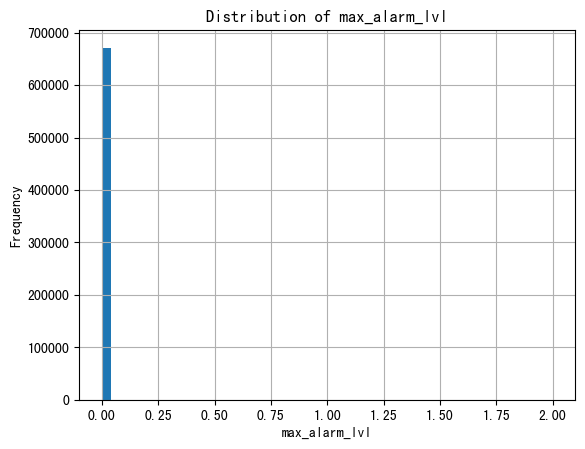

--------------------------------------------------


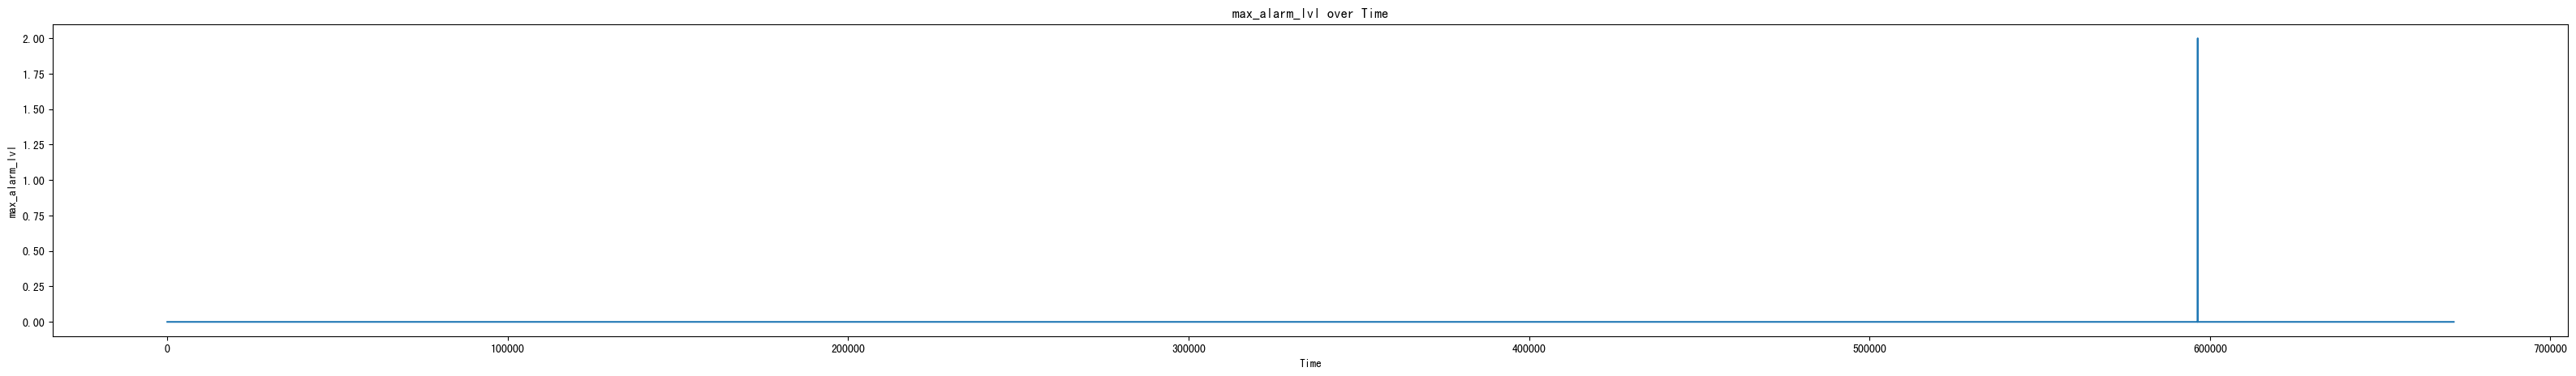

--------------------------------------------------
'max_alarm_lvl' 有 0 个缺失值
'max_alarm_lvl' 的缺失值占比为 0.00%
--------------------------------------------------
有效值范围为 [0, 3]
'max_alarm_lvl' 共有 0 个范围外值


In [23]:
analyze_column(data, 'max_alarm_lvl',0,3)

In [24]:
#打印'max_alarm_lvl'不为0的数据
data[data['max_alarm_lvl']!=0]

,time,speed,vehicle_state,charging_status,total_volt,total_current,mileage,standard_soc,cell_volt_list,max_cell_volt,...,cell_temp_list,gear,max_volt_num,min_volt_num,max_temp_num,min_temp_num,alarm_info,驱动力,制动力,挡位
596410,2020-07-04 12:01:45,0.0,1.0,3,361.4,24,83795.9,63,1:3807_3801_3802_3807_3806_3808_3811_3801_3802...,3817,...,75_73_73_73_72_72_72_72_72_72_71_71_71_71_71_7...,15,1,1,1,1,16384,0,0,9
596411,2020-07-04 12:01:55,0.0,1.0,3,361.4,24,83795.9,63,1:3807_3801_3802_3807_3806_3808_3811_3801_3802...,3817,...,75_73_73_73_72_72_72_72_72_72_71_71_71_71_71_7...,15,1,1,1,1,16384,0,0,9
596412,2020-07-04 12:02:05,0.0,1.0,3,361.4,24,83795.9,63,1:3807_3801_3802_3807_3806_3808_3811_3801_3802...,3817,...,75_73_73_73_72_72_72_72_72_72_71_71_71_71_71_7...,15,1,1,1,1,16384,0,0,9
596413,2020-07-04 12:02:15,0.0,1.0,3,361.4,24,83795.9,63,1:3807_3801_3802_3807_3806_3808_3811_3801_3802...,3817,...,75_73_73_73_72_72_72_72_72_72_71_71_71_71_71_7...,15,1,1,1,1,16384,0,0,9
596414,2020-07-04 12:02:25,0.0,1.0,3,361.4,24,83795.9,63,1:3807_3801_3802_3807_3806_3808_3811_3801_3802...,3817,...,75_73_73_73_72_72_72_72_72_72_71_71_71_71_71_7...,15,1,1,1,1,16384,0,0,9
596415,2020-07-04 12:02:35,0.0,1.0,3,361.4,24,83795.9,63,1:3807_3801_3802_3807_3806_3808_3811_3801_3802...,3817,...,75_73_73_73_72_72_72_72_72_72_71_71_71_71_71_7...,15,1,1,1,1,16384,0,0,9
596416,2020-07-04 12:02:45,0.0,1.0,3,361.4,24,83795.9,63,1:3807_3801_3802_3807_3806_3808_3811_3801_3802...,3817,...,75_73_73_73_72_72_72_72_72_72_71_71_71_71_71_7...,15,1,1,1,1,16384,0,0,9
596417,2020-07-04 12:02:55,0.0,1.0,3,361.4,24,83795.9,63,1:3807_3801_3802_3807_3806_3808_3811_3801_3802...,3817,...,75_73_73_73_72_72_72_72_72_72_71_71_71_71_71_7...,15,1,1,1,1,16384,0,0,9
596418,2020-07-04 12:03:05,0.0,1.0,3,361.4,24,83795.9,63,1:3807_3801_3802_3807_3806_3808_3811_3801_3802...,3817,...,75_73_73_73_72_72_72_72_72_72_71_71_71_71_71_7...,15,1,1,1,1,16384,0,0,9
596419,2020-07-04 12:03:15,0.0,1.0,3,361.4,24,83795.9,63,1:3807_3801_3802_3807_3806_3808_3811_3801_3802...,3817,...,75_73_73_73_72_72_72_72_72_72_71_71_71_71_71_7...,15,1,1,1,1,16384,0,0,9


### bat_fault_list 
充电储能装置故障代码列表
扩展性数据，由厂商自行定义， 可充电储能装置故障个数等于可充电储能装置故障总数 N1。

数据类型为 float64
--------------------------------------------------
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: bat_fault_list, dtype: float64
--------------------------------------------------


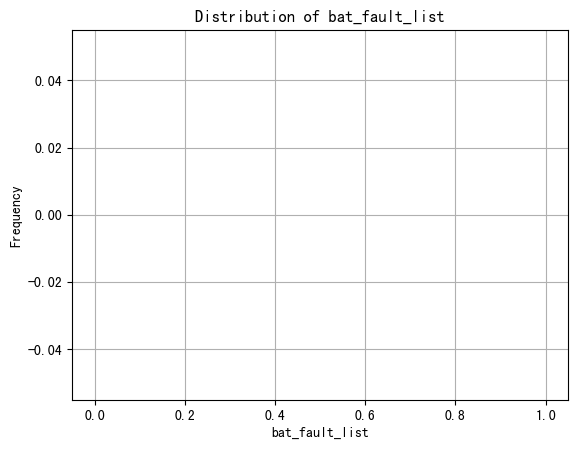

--------------------------------------------------


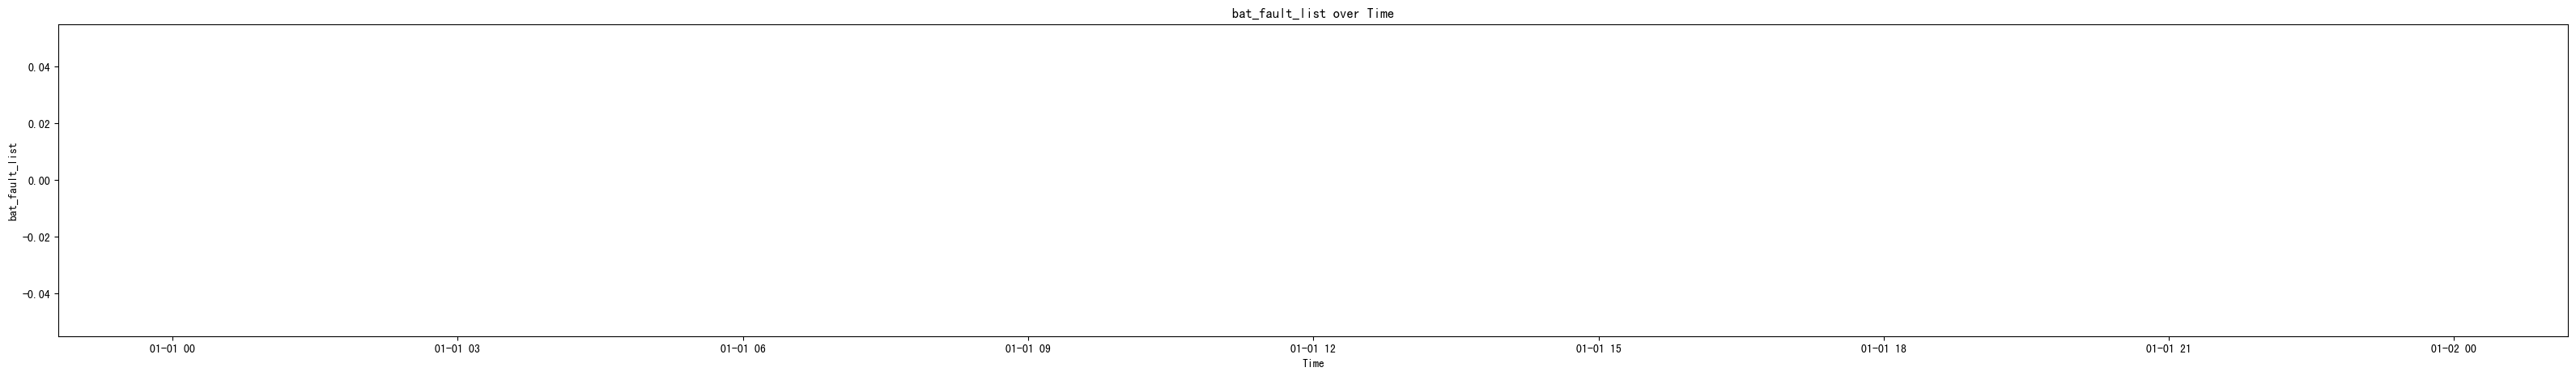

--------------------------------------------------
'bat_fault_list' 有 671644 个缺失值
'bat_fault_list' 的缺失值占比为 100.00%


In [41]:
analyze_column(data, 'bat_fault_list')

分析：完全缺失

### isulate_r
绝缘阻值
有效范围 0～60000（表示 0KΩ ～60000KΩ），最小计量单元： 1KΩ  

数据类型为 int64
--------------------------------------------------
count    671644.000000
mean       4178.591455
std         190.664978
min           9.000000
25%        4170.000000
50%        4228.000000
75%        4277.000000
max        5000.000000
Name: isulate_r, dtype: float64
--------------------------------------------------


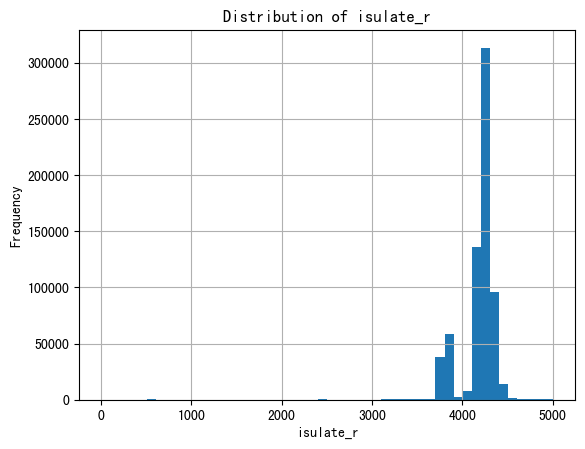

--------------------------------------------------


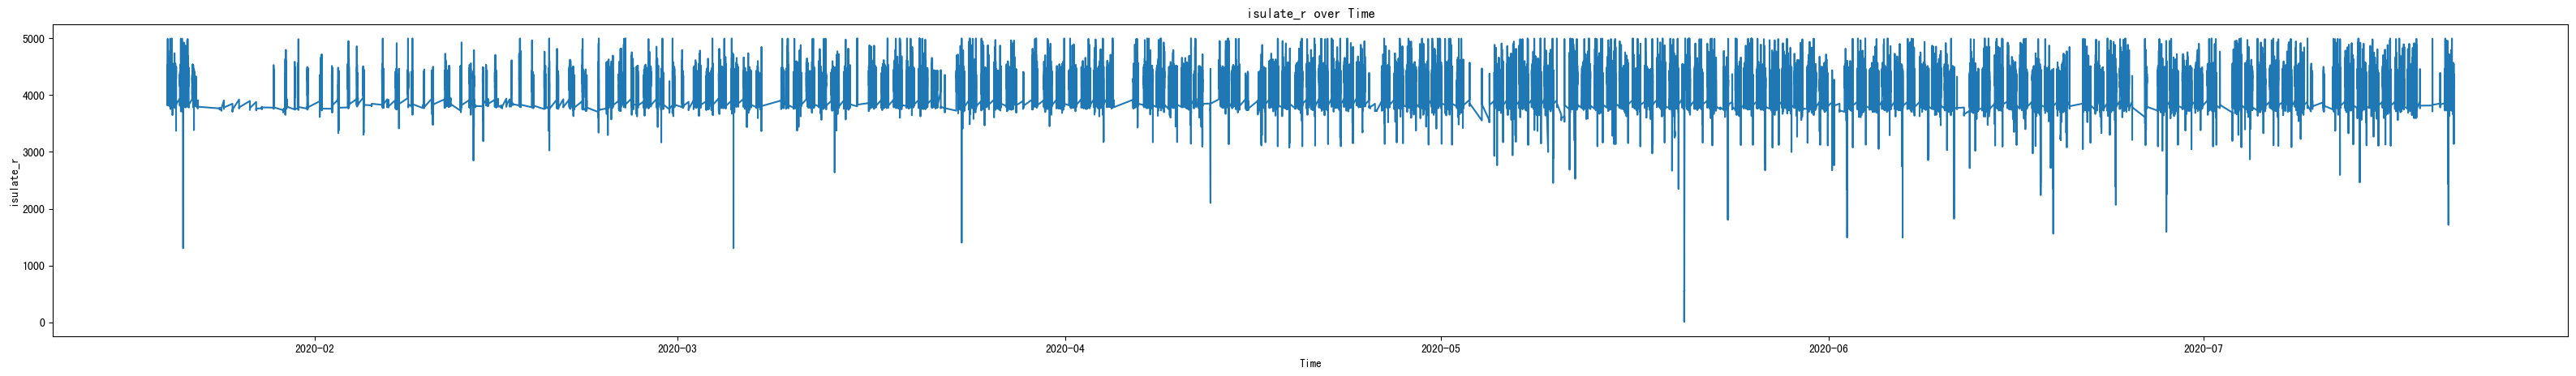

--------------------------------------------------
'isulate_r' 有 0 个缺失值
'isulate_r' 的缺失值占比为 0.00%
--------------------------------------------------
有效值范围为 [0, 60000]
'isulate_r' 共有 0 个范围外值


In [42]:
analyze_column(data, 'isulate_r', 0, 60000)

分析：存在异常值！可能很关键？

### dcdc_stat
DC-DC状态
0x01： 工作； 0x02： 断开，“0xFE”表示异常，“0xFF”表示无效。

数据类型为 int64
--------------------------------------------------
count    671644.000000
mean          1.146506
std           0.353613
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           2.000000
Name: dcdc_stat, dtype: float64
--------------------------------------------------


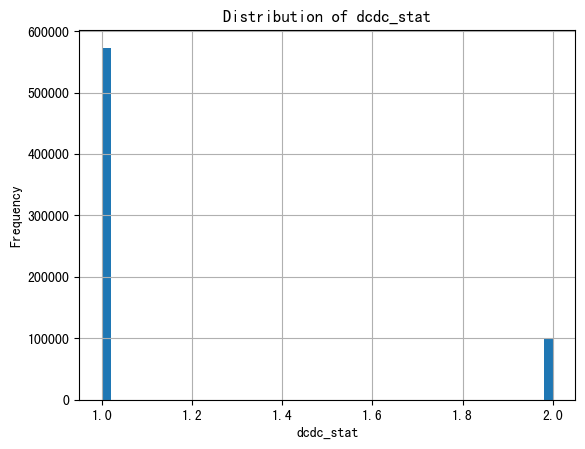

--------------------------------------------------


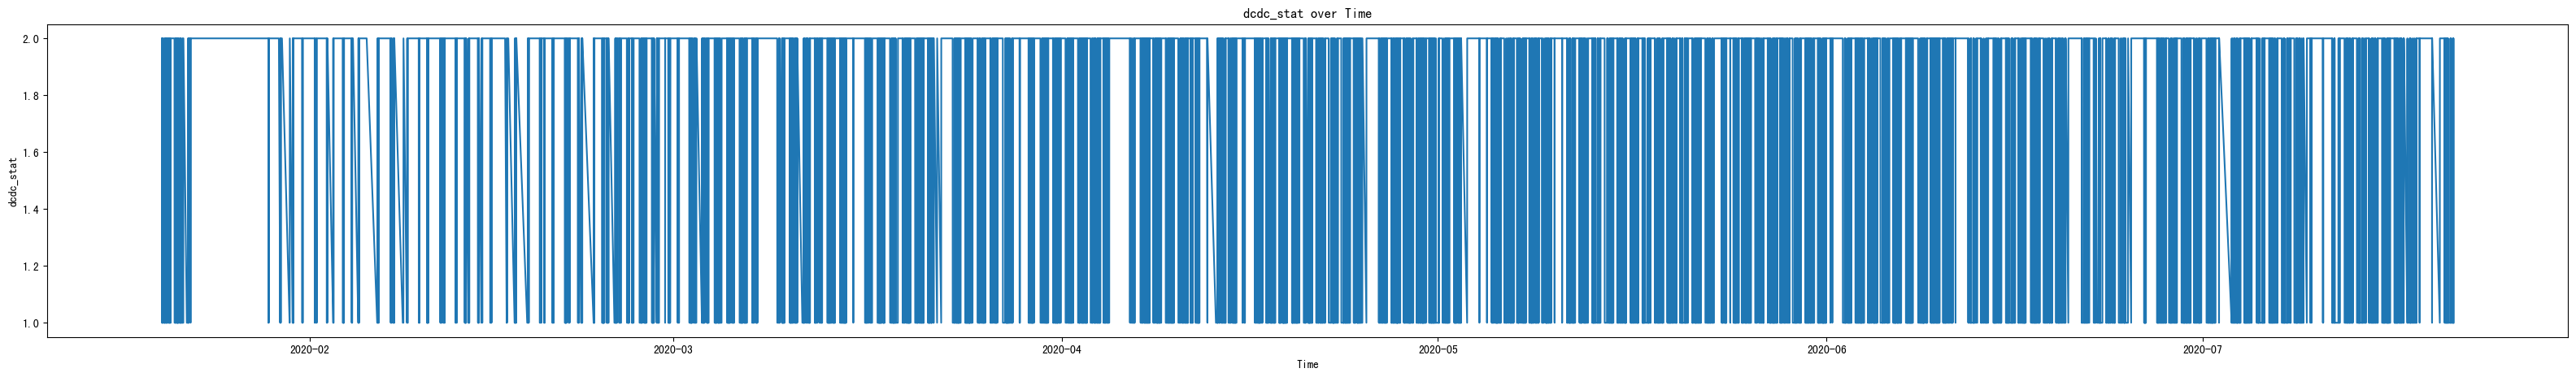

--------------------------------------------------
'dcdc_stat' 有 0 个缺失值
'dcdc_stat' 的缺失值占比为 0.00%
--------------------------------------------------
有效值范围为 [0, 2]
'dcdc_stat' 共有 0 个范围外值


In [43]:
analyze_column(data, 'dcdc_stat',0,2)

### 子系统分析：可以忽略

#### max_volt_num
最高电压电池子系统号
有效值范围：1～250，“0xFE”表示异常，“0xFF”表示无效

数据类型为 int64
--------------------------------------------------
count    671644.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: max_volt_num, dtype: float64
--------------------------------------------------


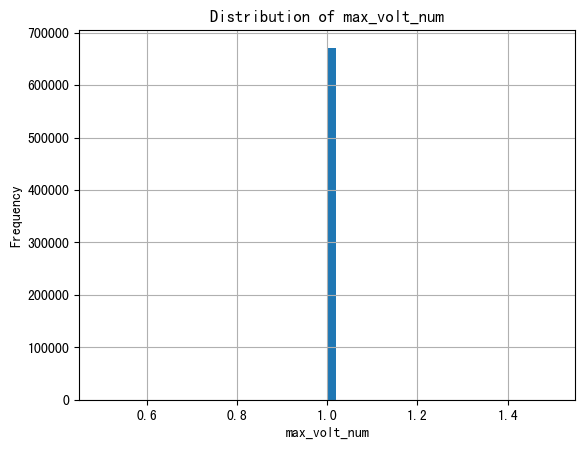

--------------------------------------------------


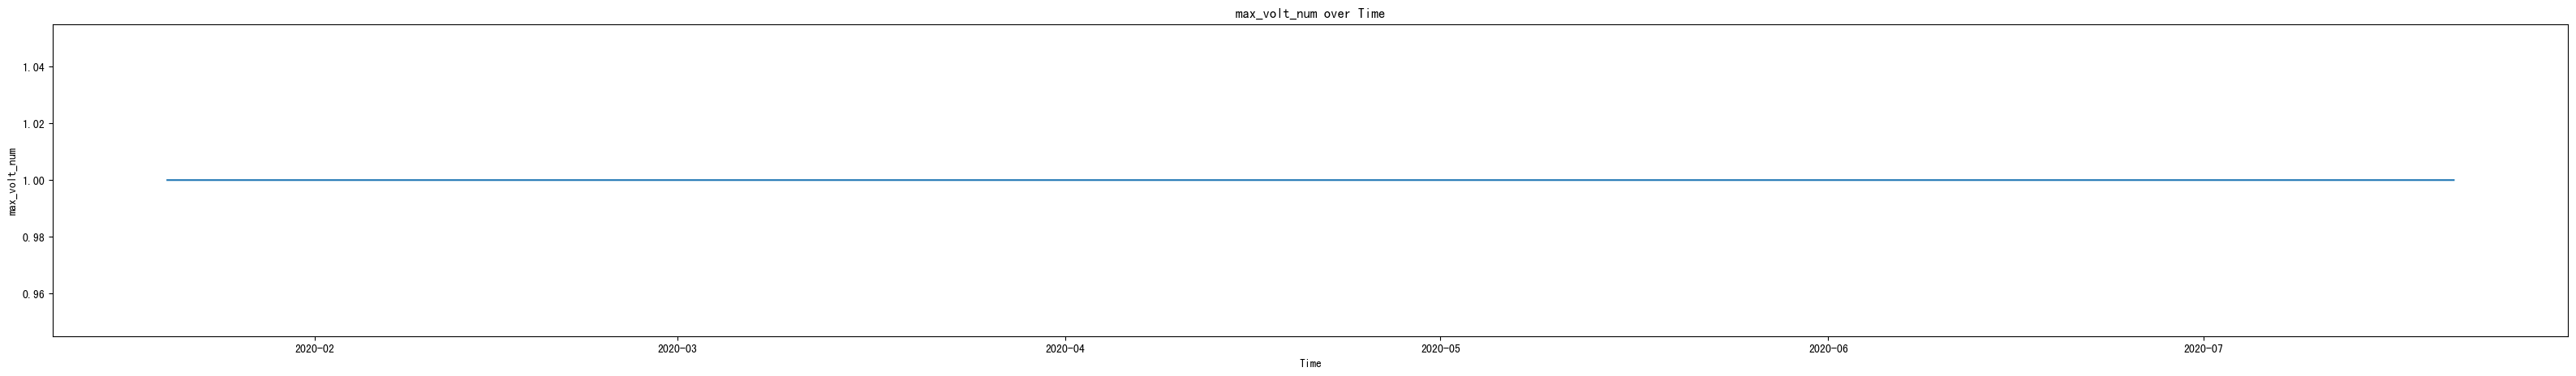

--------------------------------------------------
'max_volt_num' 有 0 个缺失值
'max_volt_num' 的缺失值占比为 0.00%
--------------------------------------------------
有效值范围为 [1, 250]
'max_volt_num' 共有 0 个范围外值


In [50]:
analyze_column(data, 'max_volt_num',1,250)

#### min_volt_num
最低电压电池子系统号
有效值范围：1～250，“0xFE”表示异常，“0xFF”表示无效

数据类型为 int64
--------------------------------------------------
count    671644.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: min_volt_num, dtype: float64
--------------------------------------------------


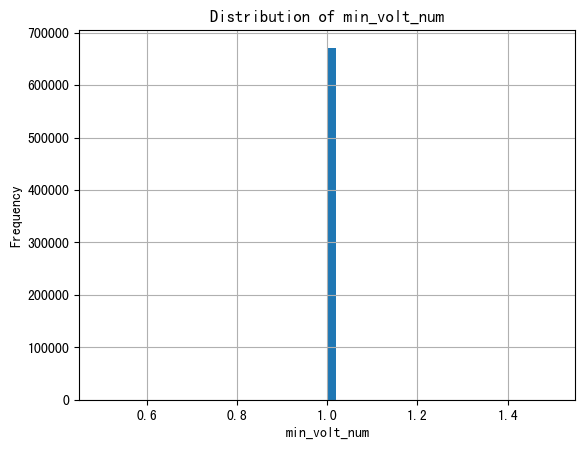

--------------------------------------------------


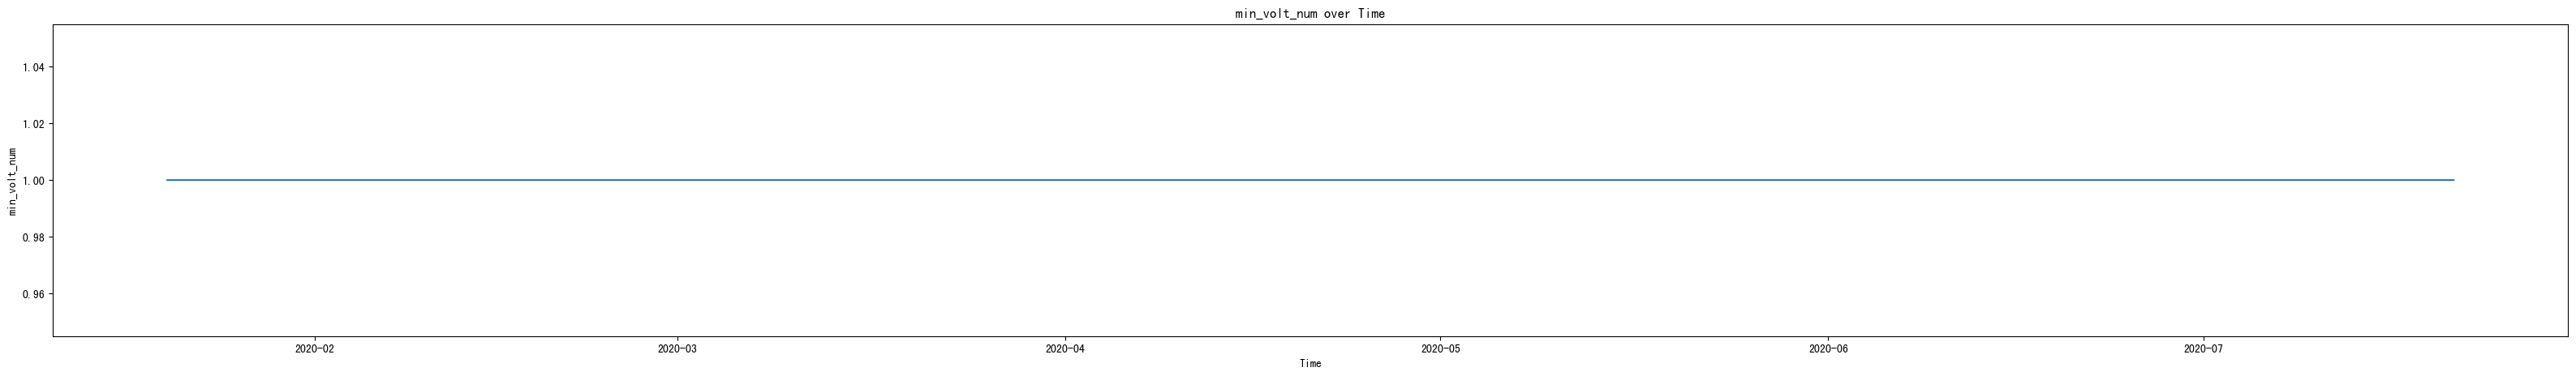

--------------------------------------------------
'min_volt_num' 有 0 个缺失值
'min_volt_num' 的缺失值占比为 0.00%
--------------------------------------------------
有效值范围为 [1, 250]
'min_volt_num' 共有 0 个范围外值


In [51]:
analyze_column(data, 'min_volt_num',1,250)

#### max_temp_num
最高温度子系统号
有效值范围：1～250，“0xFE”表示异常，“0xFF”表示无效

数据类型为 int64
--------------------------------------------------
count    671644.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: max_temp_num, dtype: float64
--------------------------------------------------


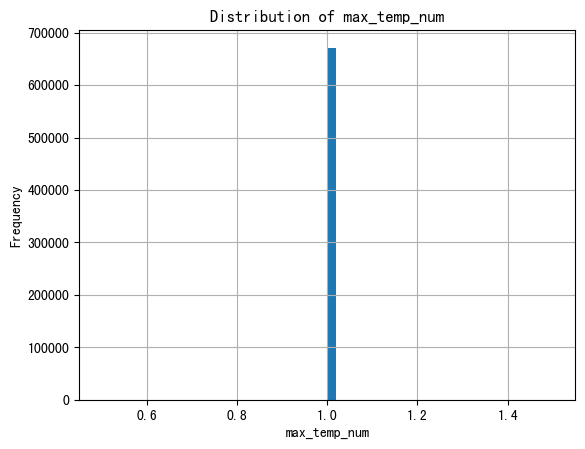

--------------------------------------------------


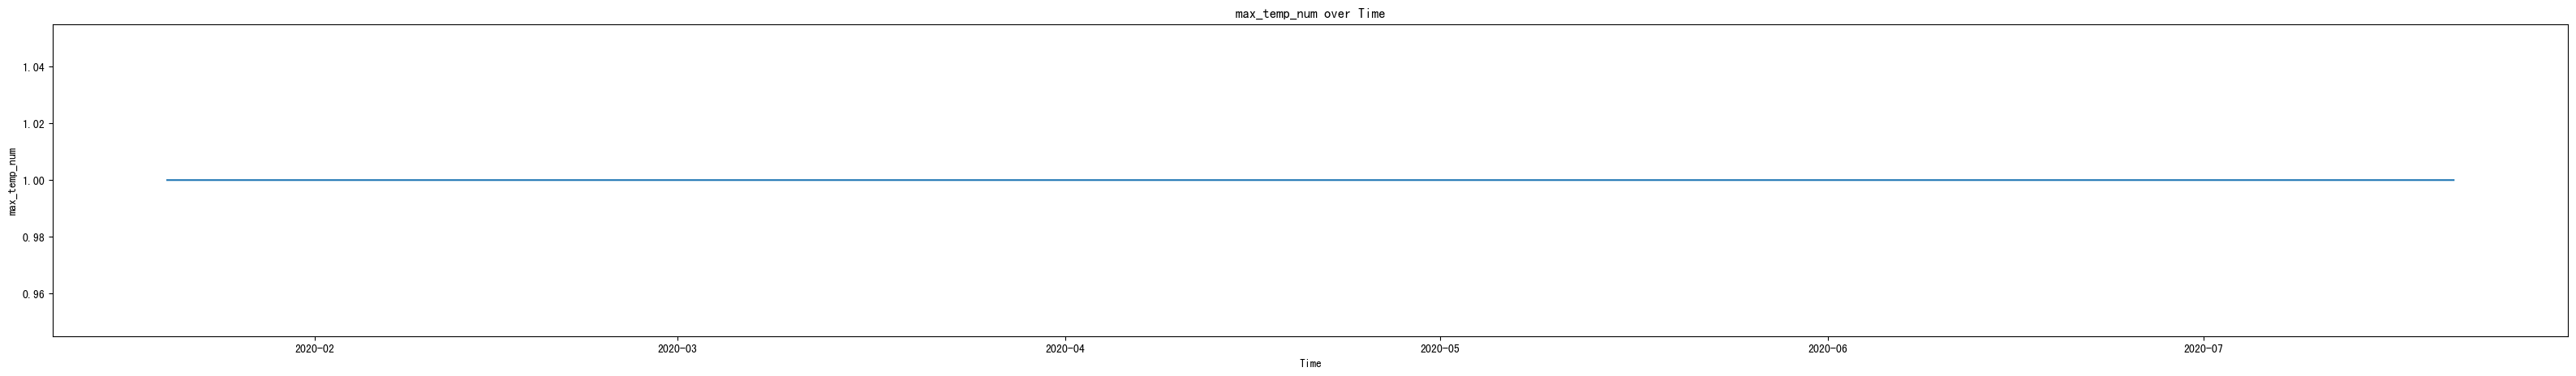

--------------------------------------------------
'max_temp_num' 有 0 个缺失值
'max_temp_num' 的缺失值占比为 0.00%
--------------------------------------------------
有效值范围为 [1, 250]
'max_temp_num' 共有 0 个范围外值


In [52]:
analyze_column(data, 'max_temp_num',1,250)

#### min_temp_num
最低温度子系统号
有效值范围：1～250，“0xFE”表示异常，“0xFF”表示无效

数据类型为 int64
--------------------------------------------------
count    671644.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: min_temp_num, dtype: float64
--------------------------------------------------


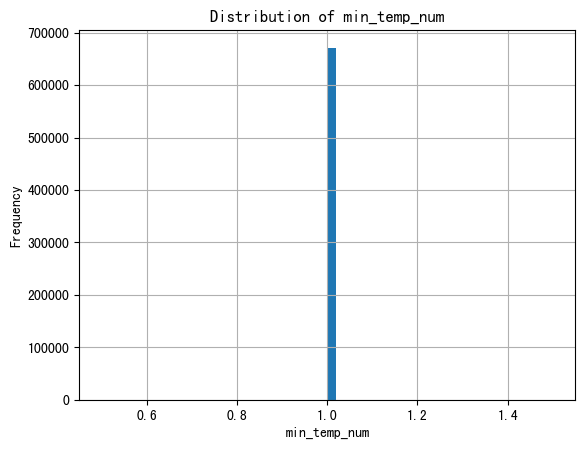

--------------------------------------------------


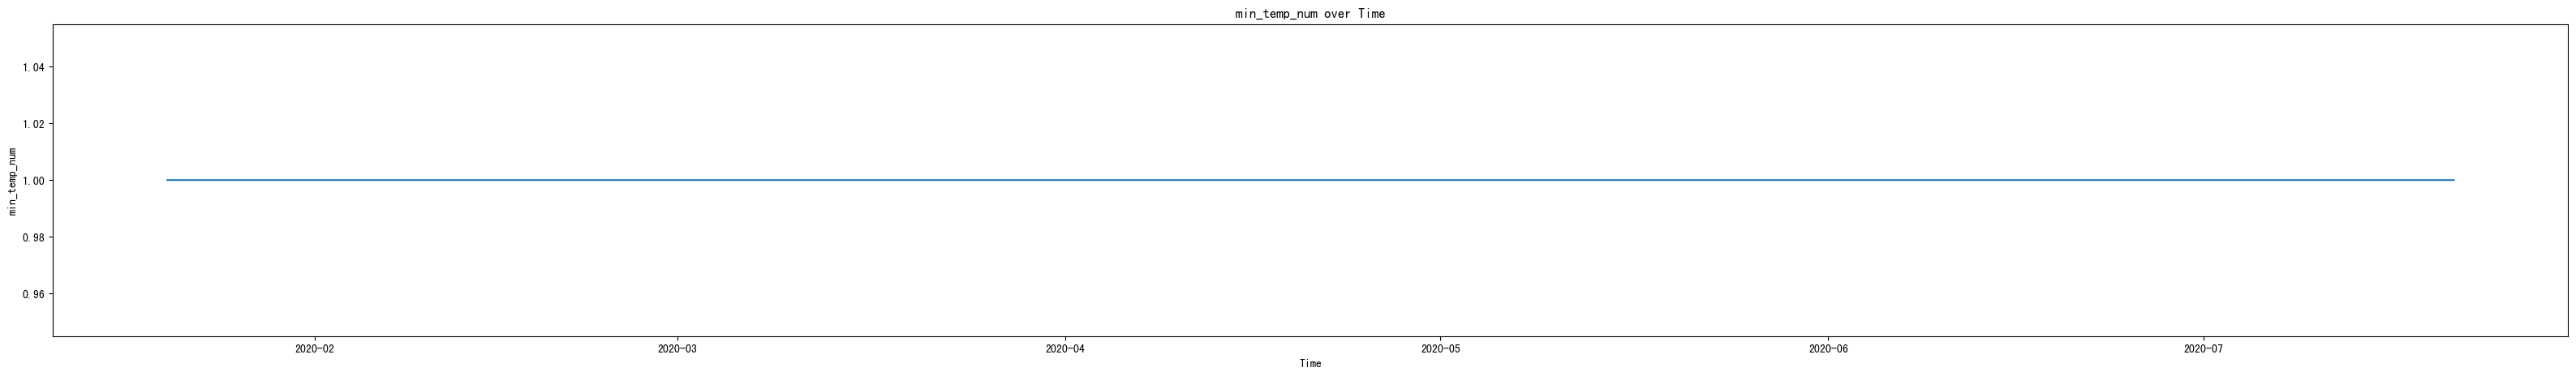

--------------------------------------------------
'min_temp_num' 有 0 个缺失值
'min_temp_num' 的缺失值占比为 0.00%
--------------------------------------------------
有效值范围为 [1, 250]
'min_temp_num' 共有 0 个范围外值


In [53]:
analyze_column(data, 'min_temp_num',1,250)

分析：都只有一个子系统，所以不需要进行分析

### alarm_info
通用报警标志

数据类型为 int64
--------------------------------------------------
count    671644.000000
mean          0.512271
std          91.612250
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       16384.000000
Name: alarm_info, dtype: float64
--------------------------------------------------


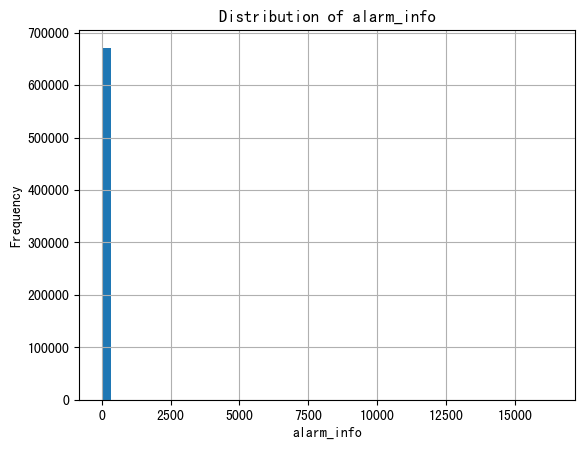

--------------------------------------------------


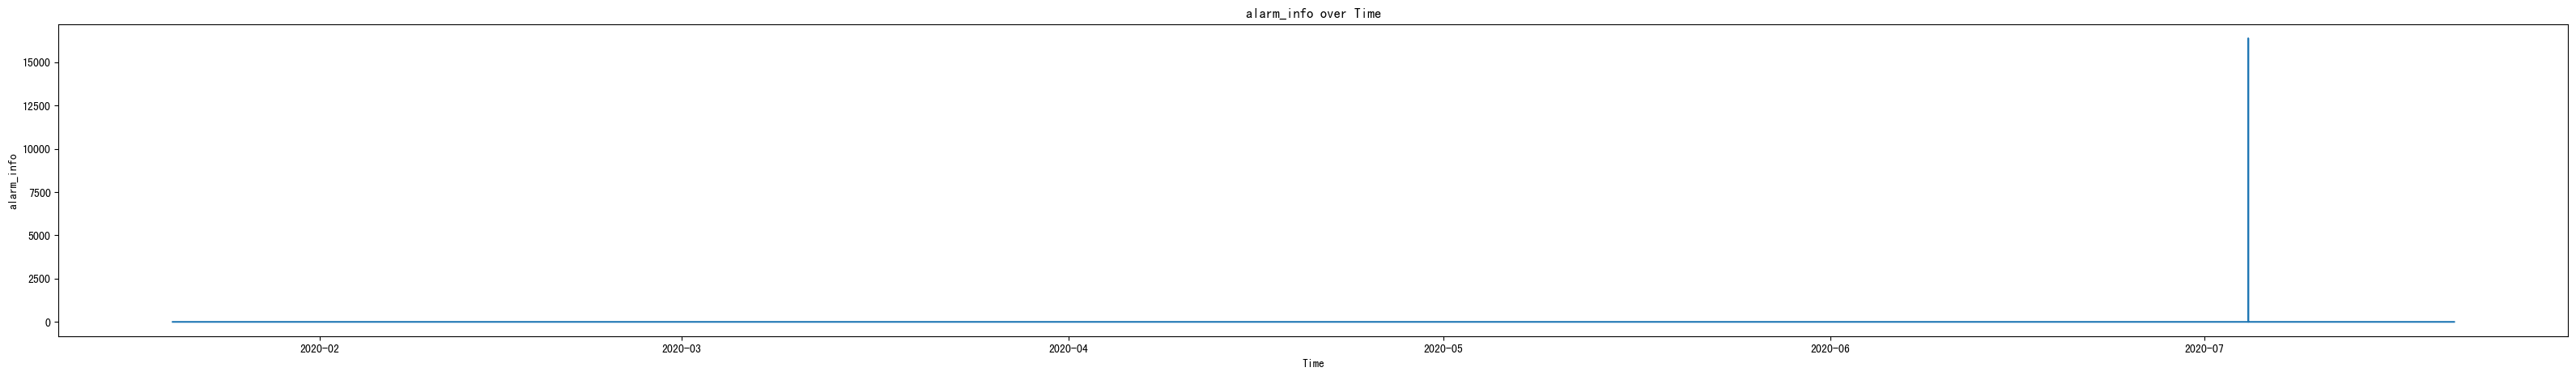

--------------------------------------------------
'alarm_info' 有 0 个缺失值
'alarm_info' 的缺失值占比为 0.00%


In [54]:
analyze_column(data, 'alarm_info')

报警位说明
| 位 | 定义 | 处理说明 |
|---|---|---|
| 0 | 1：温度差异报警；0：正常 | 标志维持到报警条件解除 |
| 1 | 1：电池高温报警；0：正常 | 标志维持到报警条件解除 |
| 2 | 1：车载储能装置类型过压报警；0：正常 | 标志维持到报警条件解除 |
| 3 | 1：车载储能装置类型欠压报警；0：正常 | 标志维持到报警条件解除 |
| 4 | 1：SOC低报警；0：正常 | 标志维持到报警条件解除 |
| 5 | 1：单体电池过压报警；0：正常 | 标志维持到报警条件解除 |
| 6 | 1：单体电池欠压报警；0：正常 | 标志维持到报警条件解除 |
| 7 | 1：SOC过高报警；0：正常 | 标志维持到报警条件解除 |
| 8 | 1：SOC跳变报警；0：正常 | 标志维持到报警条件解除 |
| 9 | 1：可充电储能系统不匹配报警；0：正常 | 标志维持到报警条件解除 |
| 10 | 1：电池单体一致性差报警；0：正常 | 标志维持到报警条件解除 |
| 11 | 1：绝缘报警；0：正常 | 标志维持到报警条件解除 |
| 12 | 1：DC-DC温度报警；0：正常 | 标志维持到报警条件解除 |
| 13 | 1：制动系统报警；0：正常 | 标志维持到报警条件解除 |
| 14 | 1：DC-DC状态报警；0：正常 | 标志维持到报警条件解除 |
| 15 | 1：驱动电机控制器温度报警；0：正常 | 标志维持到报警条件解除 |
| 16 | 1：高压互锁状态报警；0：正常 | 标志维持到报警条件解除 |
| 17 | 1：驱动电机温度报警；0：正常 | 标志维持到报警条件解除 |
| 18 | 1：车载储能装置类型过充；0：正常 | 标志维持到报警条件解除 |
| 19~31 | 预留 | 标志维持到报警条件解除 |


分析：该车出现了 DC_DC状态的报警，需要和前面的max_alarm_lvl进行一致性判断

In [ ]:
#划分充电与行驶状态


# 进一步预处理

## 处理问题1: charging_status检查一致性

In [58]:
#打印max_temp缺失值所在的行
data[data['vehicle_state'].isnull()]

,speed,vehicle_state,charging_status,total_volt,total_current,mileage,standard_soc,cell_volt_list,max_cell_volt,max_volt_cell_id,...,alarm_info,max_temp_and_index,min_temp_and_index,max_temp_real,max_temp_probe_id_real,min_temp_real,min_temp_probe_id_real,驱动力,制动力,挡位
time,,,,,,,,,,,,,,,,,,,,,
2020-03-24 09:40:17,0.0,NaN,3,345.1,0.4,64386.9,34,"[3.6310000000000002, 3.632, 3.632, 3.633, 3.63...",3.635,19,...,0,"(65, 12)","(64, 1)",65,12,64,1,0,0,9
2020-05-24 16:37:14,0.0,NaN,3,379.0,0.0,75607.7,80,"[3.99, 3.989, 3.991, 3.991, 3.988, 3.991, 3.99...",3.997,95,...,0,"(71, 1)","(68, 11)",71,1,68,11,0,0,9


In [62]:
#打印max_temp缺失值所在的行的速度列、档位列、充电状态
data[data['vehicle_state'].isnull()][['speed','挡位','charging_status']]

,speed,挡位,charging_status
time,,,
2020-03-24 09:40:17,0.0,9,3
2020-05-24 16:37:14,0.0,9,3
